 <font size="6">Нейронные сети</font>

# Ограничения линейного классификатора

Вспомним материал лекции №2. Мы разбирали решение задачи классификаци при помощи линейного классификатора.

Рассмотрим линейный классификатор, обученный на датасетах MNIST и CIFAR-10.


<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/input_img_scalar_product_add_bias_get_scores.jpg" width="600">

- Основная операция линейного классификатора: скалярное произведение
- Функция потерь: Cross-Entropy Loss
- Метод обучения: градиентный спуск
- Оценка точности линейного классификатора на MNIST: $\approx 0.85$, на CIFAR-10: $\approx 0.38$.

Визуализируем шаблоны (матрицы весовых коэффициентов), получающиеся в результате обучения линейного классификатора.

In [ ]:
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L05/lc_mnist_weights.txt
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L05/lc_cifar10_weights.txt

Сначала посмотрим на веса, которые выучивает линейный классификатор для датасета MNIST

MNIST содержит $60\ 000$ изображений рукописных цифр, размеченных на $10$ классов — по числу цифр. Каждый пример представляет собой изображение размером $28\times28$ пикселей в оттенках серого.

Shape with bias: (785, 10)
Shape without bias: (784, 10)


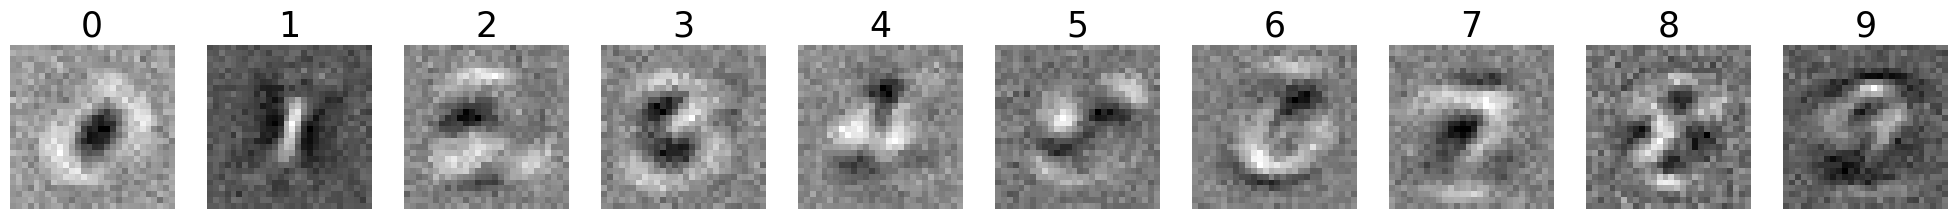

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Display templates
plt.rcParams["figure.figsize"] = (25, 10)

W = np.loadtxt("lc_mnist_weights.txt")  # load weigths, shape (785, 10)
print(f"Shape with bias: {W.shape}")

# Remove bias
W = W[:-1, :]
print(f"Shape without bias: {W.shape}")

# Normalize
w_min, w_max = np.min(W), np.max(W)
templates = 255 * (W - w_min) / (w_max - w_min)

# Display templates
labels_names = [str(i) for i in range(10)]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    img = templates[:, i].reshape(28, 28).astype(int)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(labels_names[i], size=25)

А теперь взглянем на шаблоны линейного классификатора для датасета CIFAR-10:

Shape with bias: (3073, 10)
Shape without bias: (3072, 10)


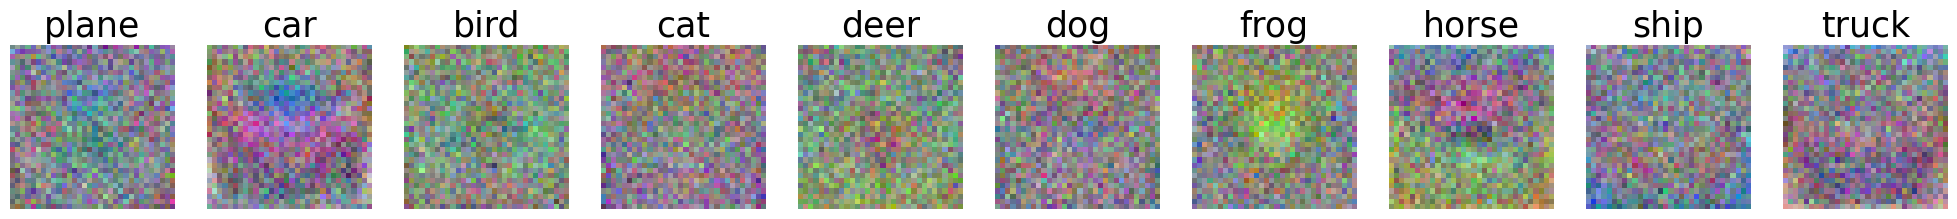

In [ ]:
# Display templates
plt.rcParams["figure.figsize"] = (25, 10)

W = np.loadtxt("lc_cifar10_weights.txt")  # load weigths, shape (3073, 10)
print(f"Shape with bias: {W.shape}")

# Remove bias
W = W[:-1, :]
print(f"Shape without bias: {W.shape}")

# Normalize
w_min, w_max = np.min(W), np.max(W)
templates = 255 * (W - w_min) / (w_max - w_min)

# Display templates
labels_names = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
for i in range(10):
    plt.subplot(1, 10, i + 1)
    img = templates[:, i].reshape(3, 32, 32).transpose(1, 2, 0).astype(int)
    plt.imshow(img)
    plt.axis("off")
    plt.title(labels_names[i], size=25)

Качественное отличие датасетов MNIST и CIFAR-10 заключается в том, что в CIFAR-10 выше **внутриклассовая вариативность**. Это значит, что изображения внутри каждого класса могут достаточно сильно различаться. Лошадь может стоять головой направо или налево, на фоне леса или на фоне поля, и т. д. В датасете MNIST внутриклассовая вариативность гораздо ниже: все цифры отцентрированы, и изображения одной и той же цифры в среднем гораздо больше похожи друг на друга.

Ограничение линейного классификатора состоит в том, что для каждого класса существует только один шаблон. Шаблон каждого класса будет пытаться вобрать в себя информацию обо всех объектах класса сразу (например, на получившихся шаблонах для CIFAR-10 у лошади две головы, машина красная и т. д.). Сильная внутриклассовая вариативность будет мешать линейному классификатору запоминать разные варианты объектов одного класса, и это ограничивает точность модели.

## Проблемы классификации более сложных объектов

Человек узнает на изображении кошку или любой другой объект, руководствуясь целостным представлением о данном объекте на изображении. Такое целостное интуитивное представление об объектах для компьютера напрямую недоступно. С точки зрения компьютера, изображение представляет собой не более чем таблицу из чисел, кодирующих цвета всех его пикселей. Небольшое цветное изображение (с тремя  цветовыми каналами: красным, зеленым и синим) в разрешении $32 \times 32$ для компьютера представлено просто упорядоченным набором из $32 \times 32 \times 3 = 3072 $ целых чисел.

Легко себе представить ситуацию, в которой изображения одного и того же объекта будут значительно отличаться. Так, например, один и тот же кот может быть представлен на фотографии в различных позах, фотографии могут отличаться условиями освещения, яркостью или контрастностью. Кроме того, на одной из фотографий может быть изображен только фрагмент объекта — скажем, только хвост. Все эти факторы не являются преградой для распознавания человеком, и мы хотим потребовать того же и для реализованных на компьютере алгоритмов классификации.


Вот лишь малая часть параметров, которые будут влиять на точность распознавания классификатора:


<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/problem_classification_difficult_object.png" width="700">

Все описанные выше сложности обобщенно можно назвать **внутриклассовой вариативностью**: мы можем приписывать к одному классу объекты, которые допускают широкий спектр определения. Так, например, мы обобщаем классом "кошка" кошек различных пород, размеров и возрастов. "Хороший" алгоритм классификации должен быть устойчив к внутриклассовой вариативности и верно распознавать все возможные варианты объектов.

##  ХОR — проблема

На самом деле линейный классификатор плохо справляется даже с более простыми задачами, чем классификация изображений. Рассмотрим такую задачу: на вход модели подаётся упорядоченный набор из двух чисел согласно таблице истинности некоторой логической функции. Задача линейного классификатора — сопоставить этим числам их класс согласно таблице. Графически два входных числа можно изобразить как координаты точек на плоскости, а знаком $+/-$ обозначить их истинный класс. Тогда задача классификатора — построить линию, отделяющую "плюсы" (класс 1) от "минусов" (класс 0).

В случае моделирования логических функций "И" и "ИЛИ" сложностей не возникает: в пространстве признаков без труда можно провести прямую линию, разделяющую точки разных классов. В случае моделирования логической функции "исключающее ИЛИ" (XOR) видно, что одной линией разделить точки разных классов геометрически невозможно — точки, размеченные по таблице истинности XOR, являются **линейно неразделимыми**.

То есть, линейный классификатор уже не может справиться с этой, казалось бы, простой задачей.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/xor_problem.png"  width="900">

# Многослойные нейронные сети

Одна из идей для решения проблемы внутриклассовой вариативности — модифицировать модель таким образом, чтобы у нее внутри было не по одному шаблону на каждый класс, а по несколько (скажем, 100 шаблонов вместо 10 при десяти классах). Тогда бы модель имела возможность запоминать разные объекты одного класса и далее использовать эти промежуточные шаблоны для разбиения объектов на классы.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/modified_model.png"  width="600">

$\large h= x \cdot W_1$
    
$\large S = f(h) \cdot W_2 = f(x \cdot W_1) \cdot W_2$

Реализуем эту модель на основе линейного классификатора из лекции №2.

Применяем к выходам классификатора еще один классификатор. Будет ли данная модель работать лучше?

In [ ]:
import numpy as np

x = np.random.rand(3072)  # random image
W1 = np.random.randn(3072, 10) * 0.0001  # without bias
W2 = np.random.randn(10, 1) * 0.0001  # without bias

scores1 = np.matmul(x, W1)  # matrix multiplication, equivalent x @ W1
scores2 = np.matmul(scores1, W2)  # matrix multiplication, of the next classifier

print(f"First classifier shape: {scores1.shape}")
print(f"Second classifier shape: {scores2.shape}")

First classifier shape: (10,)
Second classifier shape: (1,)


In [ ]:
w1

array([0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5])

In [ ]:
x = np.array([2,3,1,5])
w1 = np.array([[0.3, 0.4, 0.5],
               [0.3, 0.4, 0.5],
               [0.3, 0.4, 0.5],
               [0.3, 0.4, 0.5]])
w1
scores1 = np.matmul(x, w1)  # matrix multiplication, equivalent x @ W1
print(scores1)
print(scores1.sum())

[3.3 4.4 5.5]
13.2


Нетрудно заметить, что последовательное применение двух классификаторов к входным данным эквивалентно применению одного классификатора с матрицей весов, равной произведению двух матриц весов классификаторов, примененных последовательно.

$$\large \text{scores}_1 = x \cdot W_1 $$

$$\large \text{scores}_2 = \text{scores}_1 \cdot W_2 = x  \cdot W_1 \cdot W_2 $$

$$\large W = W_1 \cdot W_2 $$

$$\large \text{scores}_2 = x \cdot W $$

Для того, чтобы последовательно примененные классификаторы не вырождались в один, необходимо применить нелинейность к их выходам. Например, пропустим результат применения первой матрицы весов через сигмоиду:

$$\large \sigma(s)=\frac{1}{1+e^{-s}}$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/sigmoid_function.png" width="500">

In [ ]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))


# define vectorized sigmoid to implement with ndarray element-wise
sigmoid_np = np.vectorize(sigmoid)

scores1 = np.matmul(x, W1)
activations = sigmoid_np(scores1)  # values after non-linear function
scores2 = np.matmul(activations, W2)

print(f"First classifier shape: {scores1.shape}")
print(f"Activations shape: {scores1.shape}")
print(f"Second classifier shape: {scores2.shape}")

First classifier shape: (100,)
Activations shape: (100,)
Second classifier shape: (10,)


Теперь вычисления выглядят так:

$$\large \text{scores}_1 = x \cdot W_1 $$

$$\large \text{activations} = σ(\text{scores}_1) $$

$$\large \text{scores}_2 = \text{activations} \cdot W_2 =σ(x \cdot W_1) \cdot W_2$$

Такая нелинейная функция, примененная к результату линейного преобразования, называется **функцией активации**. И мы уже пользовались подобной, когда разбирали Cross-Entropy Loss (Softmax).

Приведем код в порядок:

In [ ]:
class NeuralNet:
    def __init__(self):
        self.W1 = np.random.randn(3072, 100) * 0.0001
        self.W2 = np.random.randn(100, 10) * 0.0001

    def predict(self, x):
        scores1 = np.matmul(x, W1)  # Linear
        activations = sigmoid_np(scores1)  # activation Sigmoid
        scores2 = np.matmul(activations, W2)  # Linear

        return scores2


x = np.random.rand(3072)  # image
model = NeuralNet()
scores = model.predict(x)
print(f"Model output shape: {scores.shape}")

Model output shape: (10,)


Ядром вычислений по-прежнему является скалярное произведение входов с весовыми коэффициентами.

Таким образом вводится модель искусственного нейрона — базового элемента искусственной нейронной сети. Выходом нейрона является результат применения функции активации к взвешенной сумме входных сигналов (в общем случае, с учетом смещения — "bias").


<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/neurons_output.png" width="900">

Нейроны в нейронных сетях объединяют в слои и соединяют между слоями по принципу "каждый с каждым". Так получаются **многослойные полносвязные нейронные сети** (fully-connected networks). Синонимичным названием является **многослойный персептрон**.

Пример многослойного персептрона с двумя скрытыми слоями:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/nn_fully_connected.png"  width="500">

То, как добавление в модель скрытых слоев с нелинейностями позволяет решать линейно неразделимые задачи (вроде XOR или более сложные), можно пронаблюдать [в интерактивном тренажере от TensorFlow 🎮[demo]](http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=&seed=0.62952&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

##  Веса и смещения

Веса и смещения являются настраиваемыми параметрами в нейронной сети. Они настраиваются в процессе обучения, поэтому их также называют **обучаемыми параметрами**. Рассмотрим, как различные значения обучаемых параметров влияют на работу одного нейрона. Это поможет нам получить интуицию, как добавление в модель скрытых слоев с нелинейностями наделяет её большей выразительной способностью.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/why_add_bias_example.png" width="500">

Рассмотрим простой пример. На вход нейрона подаётся входное значение $x$, умноженное на вес $w$. После применения сигмоидальной функции активации, в зависимости от веса, при всевозможных значениях входа мы можем получить следующие графики при $w$ равном $0.5$, $1$ и $2$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/sigmoid_with_different_weights.png" width="700"></center>

Можно заметить, что значение веса меняет **крутизну** итоговой сигмоидальной функции.

Но что, если требуется, чтобы при $x=5$ нейрон выдавал $0$? Изменением крутизны сигмоиды этого не добиться. Требуется дополнительный параметр — смещение.


**Смещение** (англ. bias) — это дополнительный коэффициент, прибавляющийся к взвешенной сумме входов. Наличие смещения позволяет сдвинуть функцию активации влево или вправо.



<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/add_bias_example.png" width="500">

Тогда при разных смещениях $5$, $0$ и $-5$ мы можем получить сдвинутые функции активации, что способствует лучшему обучению нейронной сети:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/sigmoid_with_different_biases.png" width="700"></center>

## Нейронная сеть как универсальный аппроксиматор

Известным теоретическим результатом в области нейронных сетей является **теорема об универсальной аппроксимации**, или [теорема Цыбенко 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%A6%D1%8B%D0%B1%D0%B5%D0%BD%D0%BA%D0%BE). Она гласит следующее:


> Искусственная нейронная сеть прямого распространения с одним скрытым слоем и сигмоидальными функциями активации может поточечно аппроксимировать любую непрерывную функцию многих переменных с любой наперед заданной точностью.

Условиями универсальной аппроксимации являются достаточное количество нейронов скрытого слоя и правильный подбор параметров (весовых коэффициентов и смещений) нейросети.

Данный результат неконструктивен, поскольку он не говорит, *сколько необходимо скрытых нейронов* для аппроксимации той или иной функции, а также *как следует подбирать веса и смещения*. Однако он дает основания полагать, что для аппроксимации любой функции с помощью нейросети **достаточно** одного скрытого слоя с нелинейностями в виде сигмоиды.




Для того, чтобы увидеть, как из суммы сигмоидальных функций можно построить произвольную функцию, рассмотрим следующую иллюстрацию:

In [ ]:
from IPython.display import HTML
from base64 import b64encode

!wget -qN https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/universal_approximation.mp4

mp4 = open("universal_approximation.mp4", "rb").read()
data_url = f"data:video/mp4;base64,{b64encode(mp4).decode()}"
HTML(f"<video width=1000  controls><source src={data_url} type='video/mp4'></video>")

Пусть мы имеем набор точек $(x, y)$ и предполагаем, что существует некоторая закономерность, связывающая $x$ и $y$:

$$y=f(x)$$

Мы можем подобрать такой весовой коэффициент $w_{1}$ и такое смещение $b_1$ и применить их к $x$, что после взятия от этого сигмоиды, она близко пройдет через часть наших точек.

$$\sigma_1=\sigma(w_{1}x+b_1)$$

После этого мы можем подобрать такие $w_{2}$ и $b_2$ и применить их к $x$, что взятая от этого сигмоида в сумме с $\sigma_1$ близко пройдет еще через часть наших точек.

$$\sigma_2=\sigma(w_{2}x+b_2)$$

Мы можем продолжать добавлять сигмоиды и подбирать их параметы до тех пор, пока их сумма не станет достаточно точно приближать закономерность $f(x)$, выраженную в данных.

$$\sigma_1+\sigma_2+...+\sigma_n \approx f(x)$$

В случае нашего примера $n=4$.

Этот пример не говорит, *как подбирать веса и смещения*, но показывает, что принципиально нам достаточно лишь одного скрытого слоя и нелинейностей в виде сигмоиды, чтобы в сумме они приближали произвольную закономерность, выраженную в данных. Это и утверждает теорема об универсальной аппроксимации.

Для получения дополнительной интуиции об универсальной аппроксимации рекомендуем обратиться к [A visual proof that neural nets can compute any function 📚[book]](http://neuralnetworksanddeeplearning.com/chap4.html).

# Обучение нейронной сети

На практике обучение нейронных сетей (подбор значений весов) производится при помощи **метода градиентного спуска**.

Обучение заключается в **минимизации функции потерь по обучаемым параметрам нейронной сети** — весам и смещениям.

Для минимизации функции потерь методом градиентного спуска **необходимо уметь вычислять градиент функции потерь по всем обучаемым параметрам модели**.

##  Прямое и обратное распространение

Процесс расчета градиента функции потерь по обучаемым параметрам состоит из двух этапов: **прямого и обратного распространения**.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/forward_pass.png" width="500">

Во время **прямого распространения** (forward pass) производится расчет значений на выходе модели $y_{pred}$, которые передаются в функцию потерь $\text{Loss}$ для сравнения с целевыми значениями $y_{true}$.

$$\large y_{pred}=\text{model}(x, 𝐖)$$

$$\large L=\text{Loss}(y_{true}, y_{pred})$$

Значение функции потерь зависит от целевых значений $y_{true}$, входных данных $x$ и параметров модели $𝐖$.

$$\large L=\text{Loss}(y_{true}, \text{model}(x, 𝐖)) = f(y_{true}, x, 𝐖)$$

А значит, если модель и функция потерь дифференцируемы, мы можем посчитать градиент функции потерь по обучаемым параметрам $\large \nabla_𝐖L$. Для этого нужен этап **обратного распространения** (backward pass).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/backward_pass.png" width="500">

##  Метод обратного распространения ошибки

Для эффективного численного расчета градиента функции потерь по обучаемым параметрам модели применяется **метод обратного распространения ошибки (backpropagation)**. Благодаря данному методу становится практически возможным использование метода градиентного спуска для проведения процедуры обучения.

Метод обратного распространения ошибки использует структуру многослойной нейронной сети как сложной функции, применяя правило дифференцирования сложной функции для вычисления градиента от функции потерь по весам сети. Градиент от функции потерь вычисляется при движении по **вычислительному графу** нейронной сети от её выходов в направлении входов. Именно такой порядок обхода вычислительного графа и обуславливает название метода.

### Вычислительный граф

Нейронную сеть можно представить в виде графа последовательных действий, где результат вычисляется одно действие за другим. Такое представление функций называется [вычислительным графом ✏️[blog]](https://qudata.com/ml/ru/ML_Comp_Graph.html).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/nn_fully_connected.png"  width="500">

Алгоритм обратного распространения ошибки позволяет находить градиенты для любого графа вычислений, если описываемая им функция дифференцируема.

В его основе лежит правило взятия производной сложной функции (chain rule):

Одна переменная:
$$ y(x) = f(u(g(x))) $$

$$ \frac{dy}{dx} = \frac{df}{du} \frac{du}{dg} \frac{dg}{dx}$$






Несколько переменных:

$$ y(x) = f(u_1(x),u_2(x),...u_n(x)) $$

$$ \frac{dy}{dx} = \sum_{i=1}^{n} \frac{\partial f(u_1, u_2, ... u_n)}{\partial u_i} \frac{du_i}{dx}$$

$$ \underbrace{\frac{d}{dx} f(\vec{\mathbf{u}}(x))}_{\text{Derivative of composition function}} = \overbrace{\nabla_{\vec{u}} f \cdot \vec{\mathbf{u}}'(x)}^{\text{Dot product of vectors}} $$

####  Пошаговый разбор метода обратного распространения

Пусть в каком-то узле графа производится вычисление

$$\large z = f(x, y)$$

и далее результат вычисления $\large z$ используется для вычисления функции $\large L(z)=L(f(x, y))$.

Тогда правило вычисления производных $\displaystyle \frac{\partial L}{\partial x}$ и $\displaystyle \frac{\partial L}{\partial y}$ можно представить следующим образом:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/rule_for_taking_gradients.png"  width="500">

Рассмотрим следующую функцию:

$$\Large f(w,x)=\frac{1}{1+e^{-(w_0x_0+w_1x_1+w_2)}}$$

Представим ее в виде вычислительного графа, состоящего из элементарных операций, от которых просто берутся производные:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/graph_of_calculation_gradient.png"  width="700">

На примере данной функции рассмотрим алгоритм обратного распространения ошибки и найдём величину её градиента по параметрам $\large w$.
Нам потребуется вычислить частные производные $\displaystyle \frac{\partial f}{\partial w_0}, \frac{\partial f}{\partial w_1}, \frac{\partial f}{dw_2}, \frac{\partial f}{\partial x_0}$ и $\displaystyle \frac{\partial f}{\partial x_1}$.

Пусть "веса" $w$ инициализированы значениями $w_0=2,\;w_1=-3,\;w_2=-3$, а "входные признаки" $x$ принимают значения $x_0=-1,\;x_1=-2$.

Делая прямой проход через граф вычислений для данной функции, получаем её значение для заданных $w$ и $x$ равным $f=0.73$:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/forward_pass_example.png" width="800">

Далее, в соответствии с алгоритмом обратного распространения ошибки, рассчитаем частные производные, пройдясь последовательно по графу вычислений, постепенно накапливая искомое значение для градиента функции.

Для начала зададим $\displaystyle \frac{df}{df}=1$.

Начинаем обратный проход по графу вычислений — первая вершина содержит функцию $\displaystyle f(x)=\frac{1}{x}$, производная которой равна $\displaystyle \frac{df}{dx}=-\frac{1}{x^2}$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/compute_gradient_1_step.png" width="800">

$$\large f(x)=\frac1x \quad \longrightarrow \quad \frac{df}{dx} = -\frac{1}{x^2}$$

В следующем узле находится функция $f(x)=1+x$. Производная от выражения в данном узле равняется $\displaystyle \frac{df}{dx}=1$:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/compute_gradient_2_step.png" width="800">

$$\large f(x)=c+x \quad \longrightarrow \quad \frac{df}{dx} = 1$$

Третья вершина содержит экспоненту $f(x)=e^x$. Её производная также является экспонентой $\displaystyle \frac{df}{dx}=e^x$:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/compute_gradient_3_step.png" width="800">

$$\large f(x)=e^x \quad \longrightarrow \quad \frac{df}{dx} = e^x$$

Следующая вершина, четвертая, содержит умножение на константу $f(x)=ax$. Производная равна $\displaystyle \frac{df}{dx}=a$ (в данном случае $a=-1$):

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/compute_gradient_4_step.png" width="800">

$$\large f(x)=ax \quad \longrightarrow \quad \frac{df}{dx} = a$$

Двигаясь по графу вычислений, мы дошли до узла суммирования, который имеет два входа. Относительно каждого из входов локальный градиент в вершине суммирования будет равен $1$:
$$\large f(x,y)=x+y \quad \Rightarrow \quad \frac{\partial f}{\partial x}=1  \quad \quad \frac{\partial f}{\partial y}=1$$
Так как умножение на единицу не изменит значения входного градиента, всем входам узла суммирования мы можем приписать точно такое же значение входного градиента ($0.2$), что мы имели и для самого узла суммирования. Будем действовать аналогично и со всеми остальными узлами суммирования, которые встретятся нам в вычислительном графе.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/compute_gradient_5_step.png" width="800">

Двигаясь далее к началу графа вычислений, мы подходим к вершинам умножения. Для такой вершины локальный градиент по отношению к какому-либо из входов будет равен значению оставшегося входа. Остается умножить локальный градиент на входящий.

$$\large f(w,x)=wx \quad \Rightarrow \quad \frac{\partial f}{\partial w}=x  \quad \quad \frac{\partial f}{\partial x}=w$$

Точно так же мы можем поступить и с оставшейся второй вершиной умножения, которая привязана к $w_1$ и $x_1$:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/compute_gradient_6_step.png" width="800">

Так, двигаясь по графу вычислений в обратном направлении от выхода функции к входным аргументам, мы последовательно для каждого узла умножаем локальный градиент на входящий градиент, используя цепное правило дифференцирования сложной функции. В описанном примере мы полностью разбили граф вычислений на отдельные элементарные узлы. Разбиение вычислительного графа на элементарные узлы вовсе не обязательно — мы можем сгруппировать несколько вершин вместе, если они образуют дифференцируемую функцию, от которой "удобно" брать производную, и рассматривать их совместно.

В нашем примере мы можем заметить, что вычислительный граф можно свести к двум операциям: получению выражения $w_0x_0+w_1x_1+w_2$ и последующему вычислению от него сигмоидальной функции.

Функция сигмоиды:

$$\large \displaystyle \sigma(x) = \frac{1}{1+e^{-x}}.$$

Важно отметить, что сигмоида обладает важным свойством: её производная может быть выражена через саму сигмоидальную функцию:

$$\large \frac{d}{dx}\sigma(x) = \frac{d}{dx}(1+e^{-x})^{-1} = \frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x}-1}{1+e^{-x}} = \sigma(x)\cdot(1-\sigma(x))$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/compute_gradient_join_vertices_sigmoid_example.png" width="800">

В коде без использования библиотек подсчёт градиентов можно записать как:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/calculating_gradients_in_code.png" width="800">

Для базовых операций можно выделить следующие шаблоны "разделения" градиента:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/add_copy_mul_max_gates.png" width="700">

####  Анимация работы метода обратного распространения ошибки



Таким образом, метод обратного распространения ошибки включает в себя следующие шаги:
* Forward pass (FP) — прямое распространение сигнала от входа к выходам (без которого не получить вычисленные значения в графе).
* Backward pass (BP) — расчёт величины градиента функции потерь по весам от выходного слоя ко входному.
* Обновление весов в зависимости от величины градиента. На анимации буквой $\eta$ обозначен learning rate.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L05/backprop_animation.gif" width="600"></center>

<center><em>Source: <a href="https://robocraft.ru/algorithm/560">Принцип обучения многослойной нейронной сети с помощью алгоритма обратного распространения</a></em></center>

Для более детального рассмотрения принципов работы и обучения нейронных сетей рекомендуем

[[video] 📺 Плей-лист от 3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=O3gq6RoIxoNS6iJf) [[озвучка на русском](https://youtube.com/playlist?list=PLZjXXN70PH5itkSPe6LTS-yPyl5soOovc&si=ElKVi98Ui4m2nJKq)].

#### Реализация в PyTorch

Практически вся наша работа c нейронными сетями будет осуществляться с помощью [PyTorch 🛠️[doc]](https://pytorch.org/), поэтому необходимо познакомиться с основными концептами, принципами и функциями этой библиотеки.

Лучший друг в этом, конечно же, [документация 🛠️[doc]](https://pytorch.org/docs/stable/index.html), здесь же мы разберем только основные сущности и методы.

##### Основная сущность — torch.Tensor

Класс `torch.Tensor` [🛠️[doc]](https://pytorch.org/docs/stable/tensors.html#torch.Tensor) предоставляет функциональность работы с многомерными массивами.

Создание "пустого" тензора:

In [ ]:
import torch

a = torch.Tensor()

Функция создания тензора из списка:

In [ ]:
a = torch.tensor([1.1, 2.2, 3.2])
a.dtype

torch.float32

Явное указание типа данных:

In [ ]:
a = torch.tensor([1.1, 2.2, 3.2], dtype=torch.float64)
a.dtype

torch.float64

Создание двумерного тензора, заполненного единицами (для нулей `zeros`)

In [ ]:
a = torch.ones(size=(3, 2))
a.size()

torch.Size([3, 2])

Создание двумерного тензора, заполненного указанным значением


In [ ]:
a = torch.full(size=(3, 2), fill_value=3.74)
a

tensor([[3.7400, 3.7400],
        [3.7400, 3.7400],
        [3.7400, 3.7400]])

Транспонирование (изменение порядка осей)

In [ ]:
a = a.T
a

tensor([[3.7400, 3.7400, 3.7400],
        [3.7400, 3.7400, 3.7400]])

В библиотеке реализовано большое количество математических функций

In [ ]:
c = torch.exp(a)
print("Exponents tensor:\n", c)

c += 1
print("\nAdd 1 to tensor:\n", c)

Exponents tensor:
 tensor([[42.0980, 42.0980, 42.0980],
        [42.0980, 42.0980, 42.0980]])

Add 1 to tensor:
 tensor([[43.0980, 43.0980, 43.0980],
        [43.0980, 43.0980, 43.0980]])


Почти всё, что есть в NumPy, есть в PyTorch, например, суммирование значений тензора с помощью `.sum()`:

In [ ]:
c.sum()

tensor(258.5880)

Перестановка, удаление и добавление пространственных измерений:

In [ ]:
a = torch.zeros((2, 5, 1, 8))
print("Original tensor size:\n", a.size())

a = a.permute(dims=(2, 0, 3, 1))  # permute dimensions
print("After permute tensor size:\n", a.size())

a = a.squeeze()  # delete dimension
print("After squzee tensor size:\n", a.size())

a = a.unsqueeze(dim=0)  # add dimension
print("After unsquzee tensor size:\n", a.size())

Original tensor size:
 torch.Size([2, 5, 1, 8])
After permute tensor size:
 torch.Size([1, 2, 8, 5])
After squzee tensor size:
 torch.Size([2, 8, 5])
After unsquzee tensor size:
 torch.Size([1, 2, 8, 5])


Преобразование `torch.Tensor` в `np.ndarray`:

In [ ]:
a.numpy()

array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)

PyTorch позволяет тензору быть представлением (view) существующего тензора. Тензор представления использует те же данные, что и его базовый тензор. Поддержка `view` позволяет избежать явного копирования данных, что позволяет экономить память.

In [ ]:
a = torch.rand(2, 8)
print("Original tensor:\n", a)

b = a.view(4, 4)
print("\nTensor after view:\n", b)

print("\nTensor b uses the same memory space as tensor a:")
id(a[0, 0]) == id(b[0, 0])

Original tensor:
 tensor([[0.7833, 0.0648, 0.5768, 0.1207, 0.1705, 0.6468, 0.3168, 0.5205],
        [0.0781, 0.8173, 0.8328, 0.5209, 0.7760, 0.4242, 0.5220, 0.5692]])

Tensor after view:
 tensor([[0.7833, 0.0648, 0.5768, 0.1207],
        [0.1705, 0.6468, 0.3168, 0.5205],
        [0.0781, 0.8173, 0.8328, 0.5209],
        [0.7760, 0.4242, 0.5220, 0.5692]])

Tensor b uses the same memory space as tensor a:


True

Размещение тензора на GPU:

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Cuda available: {torch.cuda.is_available()} \n")

a = a.to(device)  # moving tensor to gpu
b = torch.full_like(a, 2).to(device)
c = a * b  # compute on gpu (more fast with parallel computing)
c

Cuda available: False 



tensor([[1.5665, 0.1296, 1.1536, 0.2415, 0.3410, 1.2936, 0.6336, 1.0409],
        [0.1562, 1.6346, 1.6657, 1.0417, 1.5520, 0.8484, 1.0439, 1.1383]])

##### Автоматическое вычисление градиента

PyTorch умеет запоминать последовательность операций с тензорами и вычислять градиент.

In [ ]:
x = torch.tensor([-1.0, -2.0])  # x from above example

x = torch.cat([x, torch.tensor([1.0])])  # concatenate x with 1. for bias trick

W = torch.tensor([2.0, -3.0, -3.0], requires_grad=True)  # w from above example

print(f"W.grad = {W.grad} (before forward and backward pass grad is 'None')")

# forward pass to compute f
s = x.matmul(W)
f = torch.sigmoid(s)
print(f"f(x, W) = {f:.2f}")

# backward pass to compute gradient df/dW
f.backward()
print(f"W.grad = {W.grad}")

W.grad = None (before forward and backward pass grad is 'None')
f(x, W) = 0.73
W.grad = tensor([-0.1966, -0.3932,  0.1966])


Получили такие же значения частных производных $\displaystyle \frac{\partial f}{\partial w_i}$, как и при вычислении вручную (на иллюстрации градиент расчитан с точностью до двух знаков после запятой, в коде выше получены более точные значения).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/autograd_example.png" width="500">

Мы не требовали возможности расчета градиента по аргументу `x` (не указали `requires_grad=True`), поэтому после вызова `f.backward()` градиент по нему не рассчитается:

In [ ]:
print(f"x.grad = {x.grad}")

x.grad = None


Отсоединение тензора от графа вычислений производится с помощью `.detach()` (используется, если нужно производить какие-либо дальнейшие операции с тензором, но чтобы они не становились частью вычислительного графа):

In [ ]:
f_detached = f.detach()

print(f"f_detached = {f_detached:.2f}")
print(f"f_detached type: {type(f_detached)}")

f_detached = 0.73
f_detached type: <class 'torch.Tensor'>


Также от тензора, содержащего скаляр, можно получить его величину с помощью `.item()`:

In [ ]:
value = f_detached.item()

print(f"value = {value:.2f}")
print(f"value type: {type(value)}")

value = 0.73
value type: <class 'float'>


####  Обратное распространение в PyTorch


Рассмотрим алгоритм обратного распространения на примере вычисления квадрата ошибки для линейной регрессии (для простоты не будем рассматривать смещение):

$$\large y=w\cdot x, \quad при \;x=[1,2,3,4],\;y=[2,4,6,8],\;w=1$$

В данном примере видно, что предсказанный моделью $\hat{y}=[1,2,3,4]$ не совпадает с истинными значениями $y$, и, соответственно, квадратичная ошибка для такого примера будет:

$$\large \text{MSE}=\frac{1}{4}\sum_{i=1}^4E_i^2=\frac{1}{4}\sum_{i=1}^4(\hat{y}_i-y_i)^2=\frac{1+4+9+16}{4}=7.5$$

Градиент функции потерь по весу $w$ вычисляется следующим образом, в соответствии с цепным правилом:

$$\large \frac{\partial \text{MSE}}{\partial w} = \frac{\partial \text{MSE}}{\partial E}\cdot \frac{\partial E}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial w}$$

Рассчитаем его с использованием PyTorch:



In [ ]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# This is the parameter we want to optimize -> requires_grad=True
W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)
print(f"W.grad = {W.grad} (before forward pass must be 'None')\n")

# forward pass to compute MSE
y_pred = W * x_train
E = y_pred - y_train
SE = E**2
MSE = SE.mean()
print(f"MSE = {MSE}")

# backward pass to compute gradient dMSE/dw
MSE.backward()
print(f"W.grad = {W.grad}")

W.grad = None (before forward pass must be 'None')

MSE = 7.5
W.grad = -15.0


В данном примере мы произвели следующие расчеты:

$\displaystyle\frac{\partial \text{MSE}}{\partial E}=\frac{1}{4}\frac{\partial E^2}{\partial E}=\frac{1}{4}\cdot2\cdot E=\frac{1}{2}*[-1, -2, -3, -4]=[-0.5, -1, -1.5, -2]\quad $ $*$ — поэлементное умножение

$\displaystyle \frac{\partial E}{\partial \hat{y}}=\frac{\partial (\hat{y}-y)}{\partial \hat{y}}=1$

$\displaystyle \frac{\partial \hat{y}}{\partial w}=\frac{\partial wx}{\partial w}=x=[1, 2, 3, 4]$

$\displaystyle \frac{\partial \text{MSE}}{\partial w} = \frac{\partial \text{MSE}}{\partial E}\cdot \frac{\partial E}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial w}=\sum[-0.5, -1, -1.5, -2]*[1, 2, 3, 4]=-0.5-2-4.5-8=-15$

`MSE.backward()` автоматически вычисляет градиент $\displaystyle \frac{\partial \text{MSE}}{\partial w}$ при указании `requires_grad=True`.
Результаты вычислений будут храниться в `W.grad`. Для всех промежуточных переменных градиенты не сохраняются, поэтому попытка обратиться, например, к `E.grad` выдаст ошибку.

Также после однократного обратного прохода в целях экономии памяти граф, используемый для вычисления градиента, будет удаляться, и следующий запуск `MSE.backward()` будет выдавать ошибку:



```
MSE.backward() # Error on second backward call
```



Чтобы сохранить вычислительный граф, для аргумента `retain_graph` функции `backward()` нужно указать значение `True`. Также может быть полезным сохранять значения градиентов для промежуточных переменных, это делается с помощью функции `tensor.retain_grad()`. В таком случае, значения градиентов, полученные на следующих итерациях обратного распространения ошибки, будут складываться с текущими значениями градиентов.

Градиенты переменных, для которых был указан `retain_graph=True`, сохраняются автоматически. Чтобы избежать их накопления при многократном итерировании алгоритма обратного распространения, нужно обнулять градиент на каждом шаге с помощью функции `tensor.grad.zero_()`.

In [ ]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# This is the parameter we want to optimize -> requires_grad=True
W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)

# forward pass to compute MSE
y_pred = W * x_train
E = y_pred - y_train
E.retain_grad()  # Save grads for intermediate tensor E in memory
SE = E**2
MSE = SE.mean()

print("========== Backprop 1 ==============")
MSE.backward(retain_graph=True)
print(f"dMSE/dE = {E.grad}")
print(f"dMSE/dW = {W.grad}")

print("========== Backprop 2 ==============")
MSE.backward(retain_graph=True)
# Gradients are accumulated
print(f"dMSE/dE = {E.grad}")
print(f"dMSE/dW = {W.grad}")

print("========== Backprop 3 ==============")
W.grad.zero_()  # Nullify gradients for W for the next iteration
MSE.backward(retain_graph=True)
# Gradients for W are not accumulated, but not for E
print(f"dMSE/dE = {E.grad}")
print(f"dMSE/dW = {W.grad}")

========== Backprop 1 ==============
dMSE/dE = tensor([-0.5000, -1.0000, -1.5000, -2.0000])
dMSE/dW = -15.0
========== Backprop 2 ==============
dMSE/dE = tensor([-1., -2., -3., -4.])
dMSE/dW = -30.0
========== Backprop 3 ==============
dMSE/dE = tensor([-1.5000, -3.0000, -4.5000, -6.0000])
dMSE/dW = -15.0


Итак, мы умеем вычислять градиент $\displaystyle \frac{\partial \text{MSE}}{\partial w}$ для нашего примера. Теперь давайте с его помощью оптимизируем веса, используя алгоритм обратного распространения ошибки:

In [ ]:
x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)


# Define model output
def forward(x_train):
    return W * x_train


# Compute MSE loss
def criterion(y_pred, y_train):
    return ((y_pred - y_train) ** 2).mean()


print(f"Prediction before training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}\n")

# Training
learning_rate = 0.005
num_epochs = 102

for epoch in range(num_epochs):
    # Propagate forward
    y_pred = forward(x_train)

    # Compute MSE loss
    MSE = criterion(y_pred, y_train)

    # Propagate backward, compute gradients
    MSE.backward()

    # Update weights
    with torch.no_grad():  #  We don't want this step to be the part of the computational graph
        W -= learning_rate * W.grad

    # Nullify gradients after updating to avoid their accumulation
    W.grad.zero_()

    if epoch % 10 == 1:
        print(f"epoch {epoch}: w = {W.item():.3f}, loss = {MSE.item():.8f}")

print(f"\nPrediction after training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}")

Prediction before training: f(x) = tensor([1., 2., 3., 4.], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])

epoch 1: w = 1.144, loss = 6.41718674
epoch 11: w = 1.608, loss = 1.34952068
epoch 21: w = 1.820, loss = 0.28380114
epoch 31: w = 1.917, loss = 0.05968266
epoch 41: w = 1.962, loss = 0.01255111
epoch 51: w = 1.983, loss = 0.00263946
epoch 61: w = 1.992, loss = 0.00055505
epoch 71: w = 1.996, loss = 0.00011674
epoch 81: w = 1.998, loss = 0.00002455
epoch 91: w = 1.999, loss = 0.00000516
epoch 101: w = 2.000, loss = 0.00000109

Prediction after training: f(x) = tensor([1.9996, 3.9993, 5.9989, 7.9986], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])


Видно, что наш подход позволяет оптимизировать вес $w$ регрессии из примера и таким образом добиться почти идеального предсказания нашей модели, однако в данном подходе дополнительно можно автоматизировать вычисление функции потерь и обновление параметров с учетом градиента, используя готовые функции потерь из `torch.nn` и оптимизаторы из `torch.optim`.

In [ ]:
import torch.nn as nn

x_train = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y_train = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

W = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)


# Define model output
def forward(x_train):
    return W * x_train


print(f"Prediction before training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}\n")

# Training
learning_rate = 0.005
num_epochs = 102

criterion = nn.MSELoss()
optimizer = torch.optim.SGD([W], lr=learning_rate)

for epoch in range(num_epochs):
    # Propagate forward
    y_pred = forward(x_train)

    # Compute MSE loss
    MSE = criterion(y_pred, y_train)

    # Propagate backward, compute gradients
    MSE.backward()

    # Update weights
    optimizer.step()

    # Nullify gradients after updating to avoid their accumulation
    optimizer.zero_grad()

    if epoch % 10 == 1:
        print(f"epoch {epoch}: w = {W.item():.3f}, loss = {MSE.item():.8f}")

print(f"\nPrediction after training: f(x) = {forward(x_train)}")
print(f"True values: y = {y_train}")

Prediction before training: f(x) = tensor([1., 2., 3., 4.], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])

epoch 1: w = 1.144, loss = 6.41718674
epoch 11: w = 1.608, loss = 1.34951985
epoch 21: w = 1.820, loss = 0.28380090
epoch 31: w = 1.917, loss = 0.05968266
epoch 41: w = 1.962, loss = 0.01255111
epoch 51: w = 1.983, loss = 0.00263946
epoch 61: w = 1.992, loss = 0.00055505
epoch 71: w = 1.996, loss = 0.00011674
epoch 81: w = 1.998, loss = 0.00002455
epoch 91: w = 1.999, loss = 0.00000516
epoch 101: w = 2.000, loss = 0.00000109

Prediction after training: f(x) = tensor([1.9996, 3.9993, 5.9989, 7.9986], grad_fn=<MulBackward0>)
True values: y = tensor([2., 4., 6., 8.])


##  Функции потерь (loss functions)

Предположим, у нас есть нейронная сеть с некоторыми весами. Прежде всего мы должны понять, насколько она точна, то есть насколько наши ожидания соответствуют результату работы нейронной сети. Мы подали на вход нейронной сети пример данных, сигналы прошли через наши слои и функции активации вперёд **(forward propagation)**, и на выходе мы имеем предсказание. Как оценить его точность?

Для оценки соответствия полученного результата ожидаемому, используют функцию потерь (loss function). Значение функции потерь даёт количественную оценку величины такого соответствия.

Функция потерь в нейронной сети принимает два аргумента:
* вектор значений, который мы считаем априорно верным;
* вектор значений конечных выходов модели, который должен соответствовать априорно верному.

Важно заметить, что для успешного обучения модели методом градиентного спуска мы должны потребовать от функции потерь дифференцируемости и ограниченности снизу.

[[doc] 🛠️ Функции потерь в PyTorch](https://pytorch.org/docs/stable/nn.html#loss-functions)

###  Mean Squared Error

Mean Squared Error (MSE) — это средняя квадратическая ошибка. Данная функция потерь очень популярная, поскольку она проста для понимания и реализации, и в целом работает довольно хорошо. Применяется преимущественно **при решении задач регрессии**, когда модель предсказывает вещественное число. Чтобы рассчитать MSE, нужно взять разницу между предсказаниями вашей модели и эталонными значениями, возвести в квадрат и затем усреднить по всему набору данных (в случае обучения по мини-батчам — по размеру батча).
Результат всегда положительный, независимо от знака предсказанных и истинных значений, и идеальное значение равно 0.0

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент, средняя квадратическая ошибка между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна

$$\large \text{MSE}_i(\hat{y},y)=\frac{1}{C} \sum_{k=1}^{C}{(\hat{y}_{ik}-y_{ik})^2}$$

При вычислении по всему набору данных (или по мини-батчу) из $N$ объектов ошибка на отдельных объектах усредняется:

$$\large \text{MSE}=\frac{1}{N}\sum_{i=1}^{N}\text{MSE}_i$$


[[doc] 🛠️ MSE Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss):
```python
torch.nn.MSELoss()
```

In [ ]:
criterion = nn.MSELoss()

# batch of 1 element and 3 components in output vector
model_output = torch.Tensor([0.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

loss_mse = criterion(model_output, target)
print(f"loss_mse: {loss_mse}")

model_output: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
loss_mse: 0.25


* **Преимущество:** Использование MSE в качестве функции потерь даёт основания ожидать, что обученная с ней модель не имеет сильных "выбросов" в величине ошибки. Любой большой выброс в невязке $|\hat {Y_i} - Y_i| \ggg 0 $ при вычислении MSE был бы возведён в квадрат и дал бы вовсе огромный вклад в итоговое значение функции потерь.


* **Недостаток:** Как логично следует из описанного выше преимущества  MSE, данная функция потерь в первую очередь сильно штрафует модель за наличие выбросов в предсказаниях.  Для ряда практически важных задач, тем не менее, важнее оказывается наиболее высокая точность работы на абсолютном большинстве входных примеров, нежели отсутствие одиночных выбросов.

###  Mean Absolute Error

Средняя абсолютная ошибка (MAE) — это величина, которая измеряет среднюю по всем образцам величину невязки $|\hat{Y_i} - Y_i|$. Также может применяться **при решении задач регрессии**. Несмотря на то, что определение этой функции потерь похоже на MSE (MSE Loss можно назвать $L_2$ ошибкой, а MAE в этом смысле можно назвать $L_1$ ошибкой), средняя абсолютная ошибка имеет существенно другие свойства.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент, средняя абсолютная ошибка между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна

$$\large \text{MAE}_i(\hat{y},y)=\frac{1}{C} \sum_{k=1}^{C}{\left| \hat{y}_{ik}-y_{ik}\right|}$$

При вычислении по всему набору данных (или по мини-батчу) из $N$ объектов ошибка на отдельных объектах усредняется:

$$\large \text{MAE}=\frac{1}{N}\sum_{i=1}^{N}\text{MAE}_i$$


[[doc] 🛠️ MAE Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss):
```python
torch.nn.L1Loss()
```

In [ ]:
criterion = nn.L1Loss()

# batch of 1 element and 3 components in output vector
model_output = torch.Tensor([0.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

loss_mae = criterion(model_output, target)
print(f"loss_mae: {loss_mae}")

model_output: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
loss_mae: 0.5


* **Преимущество:** MAE не придаёт такого большого значения "выбросам", как MSE — все ошибки учитываются равнозначно в единой линейной шкале.


* **Недостаток:**  Недостаток применения MAE в качестве функции потерь при обучении модели напрямую вытекает из преимуществ. Обученная с MAE модель может показывать хорошие (или даже отличные) результаты в большинстве случаев, но на отдельных примерах может допускать большую ошибку.

###  Cross-Entropy

Кросс-энтропия — классическая функция потерь **при решении задач классификации**. Возникновение такой формы измерения различия между целевой переменной и предсказанием модели в задаче классификации мы уже рассматривали на лекции про линейные классификаторы. Напомним здесь формулу, по которой она рассчитывается.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент (**логитов** для $C$ классов), кросс-энтропия между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна

$$\large \text{CE}_i(\hat{y},y)= - \sum_{k=1}^{C}{y_{ik}\cdot\log\left(\frac{\exp(\hat{y}_{ik})}{\sum_{j=1}^{C}\exp(\hat{y}_{ij})}\right)}$$

При вычислении по всему набору данных (или по мини-батчу) из $N$ объектов ошибка на отдельных объектах усредняется:

$$\large \text{CE}=\frac{1}{N}\sum_{i=1}^{N}\text{CE}_i$$


[[doc] 🛠️ Cross-Entropy Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss):
```python
torch.nn.CrossEntropyLoss()
```

Обратите внимание, что Cross-Entropy Loss в PyTorch уже включает в себя Softmax и принимает в качестве выхода модели логиты. Поэтому при использовании данной фукции потерь ставить на последнем слое нейронной сети Softmax **не нужно**.

In [ ]:
criterion = nn.CrossEntropyLoss()


# fmt: off
model_output = torch.tensor([[2.4, 1.9, 7.3],
                             [9.5, 2.7, 4.0],
                             [5.7, 4.1, 0.2]])  # logits
# fmt: on

print(f"model_output:\n {model_output}")

target = torch.tensor([2, 0, 1], dtype=torch.long)  # class labels
print(f"target: {target}")

loss_ce = criterion(model_output, target)
print(f"loss_ce: {loss_ce}")

model_output:
 tensor([[2.4000, 1.9000, 7.3000],
        [9.5000, 2.7000, 4.0000],
        [5.7000, 4.1000, 0.2000]])
target: tensor([2, 0, 1])
loss_ce: 0.6014580726623535


$$\text{CE}_1 = - \log\left(\frac{\exp{(7.3)}}{\exp{(2.4)}+\exp{(1.9)}+\exp{(7.3)}}\right)$$

$$\text{CE}_2 = - \log\left(\frac{\exp{(9.5)}}{\exp{(9.5)}+\exp{(2.7)}+\exp{(4.0)}}\right)$$

$$\text{CE}_3 = - \log\left(\frac{\exp{(4.1)}}{\exp{(5.7)}+\exp{(4.1)}+\exp{(0.2)}}\right)$$

$$\text{CE} = \frac{1}{3}(\text{CE}_1 + \text{CE}_2 + \text{CE}_3)$$

In [ ]:
import numpy as np

ce_1 = -np.log(np.exp(7.3) / (np.exp(2.4) + np.exp(1.9) + np.exp(7.3)))
ce_2 = -np.log(np.exp(9.5) / (np.exp(9.5) + np.exp(2.7) + np.exp(4.0)))
ce_3 = -np.log(np.exp(4.1) / (np.exp(5.7) + np.exp(4.1) + np.exp(0.2)))

ce = (1 / 3) * (ce_1 + ce_2 + ce_3)
print(f"hand-calculated loss_ce: {ce}")

hand-calculated loss_ce: 0.601458161156722


* **Преимущества:** Важное свойство кросс-энтропии — возможность работать с весами для классов, а значит и возможность применения этой функции потерь при работе с несбалансированным датасетом.

#### Веса классов

При работе с несбалансированными классами модель будет чаще сталкиваться с доминирующим классом и вместо того, чтобы разбираться в признаках объектов, может начать ориентироваться на статистическое распределение классов.

Пример: датасет, в котором $95\%$ объектов относятся к классу $1$ и $5\%$ к классу $0$. Модель может выучиться всегда относить объекты к классу $1$, и в $95\%$ случаях она будет права.

В случае дисбаланса классов в задаче классификации можно изменить функцию потерь так, чтобы больше штрафовать модель за ошибки в минорных классах.

В `CrossEntropyLoss` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) в PyTorch  есть параметр `weight`, который имеет по умолчанию значение `None`. В него можно передать тензор весов **размером с количество классов** и получить взвешенную функцию потерь.

Посмотрим, как это работает. Допустим, мы получили от нейросети неверные предсказания: второй объект должен относиться к классу $1$, а не $0$:

In [ ]:
# fmt: off
# Scores for batch of two samples
model_output = torch.tensor([[30.0, 2.0],
                             [30.0, 2.0]])

target = torch.tensor([0, 1])  # Second sample belongs to class 1
# but logit for class 0 is greater: 30 > 2. So it was misclassified
# fmt: on

Подсчитаем Cross-Entropy Loss без весов:

$$\large \text{CE} = \frac{1}{2} \biggr[- \log\frac{e^{30}}{e^{30}+e^{2}} - \log\frac{e^{2}}{e^{30}+e^{2}}\biggr]\approx 14.0 $$

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
loss = criterion(model_output, target)
print(f"Loss = {loss.item():.2f}")

Loss = 14.00


Если у нас есть два класса с соотношением $4:1$, можно задать веса `weight = [0.2, 0.8]`. И, так как сеть ошиблась на классе с большим весом, ошибка вырастет:

$$\large \text{CE}_{\text{weighted}} =  \biggr[\mathbf{-0.2} \log\frac{e^{30}}{e^{30}+e^{2}} -\mathbf{0.8} \log\frac{e^{2}}{e^{30}+e^{2}}\biggr]\approx 22.4 $$

In [ ]:
weights = torch.tensor([0.2, 0.8])
criterion = torch.nn.CrossEntropyLoss(weight=weights)
loss = criterion(model_output, target)
print(f"Loss = {loss.item():.2f}")

Loss = 22.40


Сумма весов не обязана быть равной единице, важно только соотношение между весами. Часто соотношение весов делают обратно пропорциональным количеству объектов в классах.

In [ ]:
criterion = torch.nn.CrossEntropyLoss(weight=torch.tensor([1.0, 4.0]))
loss = criterion(model_output, target)
print(f"Loss = {loss.item():.2f}")

Loss = 22.40


- Иногда качество модели можно улучшить, взяв квадратные корни от полученных таким образом весов (немного снижает штрафы за ошибки на редких классах).

- Несмотря на интуитивно понятную логику работы способа, он не всегда дает значительный эффект. Тем не менее, на практике стоит пробовать экспериментировать с этим способом наряду с прочими техниками борьбы с дисбалансом.

###  Focal Loss

Focal Loss — это функция потерь, используемая в нейронных сетях для решения проблемы классификации *сложных* объектов (hard examples).

[[colab] 🥨 Подробное рассмотрение Focal Loss с примерами](https://colab.research.google.com/drive/1rM7zRySu8WulXbFiXzxBGVzILxvQ6K4A)


<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/hard_examples_fruits.png" width="800"></img>

Focal Loss немного модифицирует кросс-энтропию для придания большей значимости ошибкам на сложных объектах.

Она была предложена в статье [Focal Loss for Dense Object Detection (Lin et al., 2017) 🎓[arxiv]](https://arxiv.org/abs/1708.02002) изначально для задачи детектирования объектов на изображениях. Определяется так:

$$\large\text{FL}(p_t) = -(1 - p_t)^\gamma\log(p_t)$$

Здесь $p_t$ — предсказанная вероятность истинного класса, а $\gamma\geq0$ — настраиваемый гиперпараметр.

Focal Loss уменьшает потери на уверенно классифицируемых примерах (где $p_t>0.5$) и больше фокусируется на сложных примерах, которые классифицированы неправильно. Параметр $\gamma$ управляет относительной важностью неправильно классифицируемых примеров. Более высокое значение $\gamma$ увеличивает важность неправильно классифицированных примеров. В экспериментах авторы показали, что параметр $\gamma=2$ показывал себя наилучшим образом в их задаче.

При $\gamma=0$ Focal Loss становится равной Cross-Entropy Loss, которая может быть выражена как обратный логарифм вероятности истинного класса:

$$\large\text{CE}(p_t)=-\log(p_t)$$

Focal Loss может применяться также и в задачах с дисбалансом классов. В этом смысле объекты преобладающего класса могут считаться простыми, а объекты минорного класса — сложными.

Однако для работы с дисбалансом в Focal Loss могут быть добавлены веса для классов. Тогда формула будет выглядеть так:

$$\large\text{FL}(p_t) = -\alpha_t(1 - p_t)^\gamma\log(p_t)$$

Здесь $\alpha_t$ — вес для истинного класса, имеющий такой же смысл, как параметр `weight` в Cross-Entropy Loss.

Focal Loss не реализована в PyTorch нативно, но существуют сторонние совместимые реализации. Посмотрим, как воспользоваться [одной из них 🐾[git]](https://github.com/AdeelH/pytorch-multi-class-focal-loss).

In [ ]:
#!wget -qN https://raw.githubusercontent.com/AdeelH/pytorch-multi-class-focal-loss/master/focal_loss.py
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L05/focal_loss.py

In [ ]:
from focal_loss import FocalLoss


criterion = FocalLoss(alpha=None, gamma=2.0)

# fmt: off
model_output = torch.tensor([[2.4, 1.9, 7.3],
                             [9.5, 2.7, 4.0],
                             [5.7, 4.1, 0.2]])  # model output is logits, as in CrossEntropyLoss
# fmt: on
print(f"model_output:\n {model_output}")

target = torch.tensor([2, 0, 1], dtype=torch.long)  # class labels
print(f"target: {target}")

loss_fl = criterion(model_output, target)
print(f"loss_fl: {loss_fl}")

model_output:
 tensor([[2.4000, 1.9000, 7.3000],
        [9.5000, 2.7000, 4.0000],
        [5.7000, 4.1000, 0.2000]])
target: tensor([2, 0, 1])
loss_fl: 0.4129861891269684


Стоит отметить, что **Focal Loss следует применять с осторожностью**: если мы имеем **ошибки в разметке**, то при большом $\gamma$ можно начать очень сильно наказывать модель за ошибки на неверно размеченных примерах, что может привести к переобучению под ошибки в разметке.

### Negative Log Likelihood


Еще одной функцией потерь, которая может использоваться при решении задач классификации наряду с Cross-Entropy Loss и может встречаться при работе в PyTorch, является обратный логарифм правдоподобия (Negative Log Likelihood Loss, NLL Loss).

Данная функция потерь отличается от Cross-Entropy Loss тем, что в качестве выхода модели она ожидает **не логиты**, а **логарифмы вероятностей для классов**.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент (**логарифмов вероятностей** для $C$ классов), обратный логарифм правдоподобия между выходом модели $\hat{y}$ и целевым вектором $y$ будет равен:

$$\large \text{NLL}_i(\hat{y},y)= - \sum_{k=1}^{C}{y_{ik}\cdot\hat{y}_{ik}}$$

При вычислении по всему набору данных (или по мини-батчу) из $N$ объектов ошибка на отдельных объектах усредняется:

$$\large \text{NLL}=\frac{1}{N}\sum_{i=1}^{N}\text{NLL}_i$$


Для того, чтобы пользоваться NLL Loss при решении задачи классификации, к логитам, которые выдает модель, необходимо дополнительно применять Softmax и брать от результата натуральный логарифм, и уже результат такого вычисления передавать в NLL Loss. В PyTorch вычисление логарифма от результата применения Softmax к логитам реализовано в модуле `LogSoftmax` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html). Взаимоотношение между NLL Loss и Cross-Entropy Loss можно выразить следующей иллюстрацией:

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/ce_loss_vs_nll_loss.png" width='900'>

In [ ]:
criterion = nn.NLLLoss()
logsoftmax = nn.LogSoftmax(dim=1)

print(f"model_output:\n {model_output}")

logprobs = logsoftmax(model_output)
print(f"logprobs:\n {logprobs}")

print(f"target: {target}")

loss_nll = criterion(logprobs, target)
print(f"loss_nll: {loss_nll}")

model_output:
 tensor([[2.4000, 1.9000, 7.3000],
        [9.5000, 2.7000, 4.0000],
        [5.7000, 4.1000, 0.2000]])
logprobs:
 tensor([[-4.9119e+00, -5.4119e+00, -1.1892e-02],
        [-5.1870e-03, -6.8052e+00, -5.5052e+00],
        [-1.8730e-01, -1.7873e+00, -5.6873e+00]])
target: tensor([2, 0, 1])
loss_nll: 0.6014580726623535


Двойственность NLL Loss и Cross-Entropy Loss может немного путать. Она возникла из-за того, что NLL Loss была исторически раньше реализована в библиотеке. Было принято на выходе модели ставить LogSoftmax, и использовать NLL Loss. Позднее была реализована функция Cross-Entropy Loss, которая включала в себя одновременно LogSoftmax и NLL Loss и позволяла не добавлять в модель лишний модуль. За счет такого упрощения использование Cross-Entropy Loss быстро стало более популярно. Реализацию NLL Loss, по всей видимости, оставили в библиотеке скорее для обратной совместимости.

Еще одним важным вытекающим отличием в использовании NLL Loss и Cross-Entropy Loss является следующее. После обучения модели мы хотим пользоваться ей по назначению — для классификации. Иногда нам хочется, чтобы мы могли смотреть на выходы модели как на вероятности отнесения объектов к различным классам.

* При использовании связки LogSoftmax + NLL Loss на выходе модели имеем логарифмы от вероятностей, и для получения самих вероятностей мы должны взять экспоненту от выхода модели.

* При использовании Cross-Entropy Loss на выходе модели имеем логиты, и для получения вероятностей мы должны применить Softmax-преобразование.

[[blog] ✏️ Объяснение Negative Log Likelihood Loss](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)

[[blog] ✏️ О соотношении Cross-Entropy Loss и Negative Log Likelihood Loss](https://jamesmccaffrey.wordpress.com/2020/06/11/pytorch-crossentropyloss-vs-nllloss-cross-entropy-loss-vs-negative-log-likelihood-loss/)

###  Binary Cross-Entropy

В частном случае, когда количество классов равно двум (**задача бинарной классификации**), их можно закодировать одним числом: $0$ — для первого класса, и $1$ — для второго. Тогда сумму $\displaystyle \sum_{k=1}^{C}$ в формуле Cross-Entropy Loss можно расписать в явном виде.

Для $i$-го объекта выборки, когда выход модели является скаляром (**вероятностью** отнесения объекта к классу $1$), бинарная кросс-энтропия между выходом модели $\hat{y}$  и целевым значением $y$ будет равна

$$\text{BCE}_i(\hat{y},y)= - [{y_i\cdot\log(\hat{y_i})+(1-y_i)\cdot\log(1-\hat{y_i})}]$$

При вычислении по всему набору данных (или по мини-батчу) из $N$ объектов ошибка на отдельных объектах усредняется:

$$\text{BCE}=\frac{1}{N}\sum_{i=1}^{N}\text{BCE}_i$$

[[doc] 🛠️ Binary Cross-Entropy Loss в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss):

```python
torch.nn.BCELoss()
```



Важной особенностью BCE Loss является то, что здесь используется не one-hot кодирование целевых значений для двух классов, а **одно число: 0 — первый класс, 1 — второй класс.** При этом значения целевой переменной должны быть представлены как вещественные (float) числа.

In [ ]:
criterion = nn.BCELoss()

model_output = torch.rand(1)
print(f"model_output: {model_output}")

target = torch.empty(1).random_(2)
print(f"target: {target}")

loss_bce = criterion(model_output, target)
print(f"loss_bce: {loss_bce}")

model_output: tensor([0.5263])
target: tensor([0.])
loss_bce: 0.7471612095832825


Если классы "абсолютно полностью" не совпали, то возникает ситуация взятия логарифма от $0$, а он не определён и стремится к бесконечности, поэтому берётся "обрезанная бесконечность", равная $100$.

Далее, если сэмплов несколько, то по умолчанию берётся среднее по сэмплам. См. аргумент `reduction`.

In [ ]:
criterion = nn.BCELoss()

model_output = torch.ones(5)
print(f"model_output: {model_output}")

target = torch.zeros(5)
print(f"target: {target}")

loss_bce = criterion(model_output, target)
print(f"loss_bce: {loss_bce}")

model_output: tensor([1., 1., 1., 1., 1.])
target: tensor([0., 0., 0., 0., 0.])
loss_bce: 100.0


### Binary Cross-Entropy With Logits

Для того, чтобы выход модели при бинарной классификации представлял собой **вероятность отнесения объекта к классу $1$**, на выходе модели мы должны использовать логистическую функцию (sigmoid), результат которой можно будет передать в BCE Loss.

По аналогии с NLL Loss и Cross-Entropy Loss, у BCE Loss есть своя "пара": BCE With Logits Loss. Эта функция потерь совмещает в себе две операции:

* применение логистической функции Sigmoid,
* расчет BCE Loss.

Как можно понять из названия, BCE With Logits Loss на вход ожидает логиты. Взаимоотношение между BCE Loss и BCE With Logits Loss можно отобразить такой иллюстрацией:

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/bce_loss_vs_bce_with_logits_loss.png" width="900">

Функцию потерь BCE Loss (или ее "аналог" BCE With Logits Loss) можно применять не только в случае бинарной классификации, но и **в случае Multi-label классификации**.

В таком случае в векторе целевых значений вероятностей для каждого объекта может быть больше, чем одна единица. А логиты на последнем слое сети независимо пропускаются через сигмоиду (а не через Softmax, как в случае с многоклассовой классификацией).

### Итоги

Кросс-энтропия предпочтительнее для задач *классификации*, так как от модели требуется предсказание *вероятности класса* при известной априорной вероятности. Средняя квадратическая и средняя абсолютная ошибки предпочтительны для задач *регрессии*, когда от модели требуется предсказание произвольных вещественных чисел.

И то, и другое можно рассматривать как оценки максимального правдоподобия, просто с различными предположениями о зависимой переменной.

Здесь были рассмотрены лишь наиболее общие и часто применяющиеся функции потерь для основополагающих задач машинного обучения: классификации и регрессии. Однако на практике могут возникать случаи, когда от исследователя или разработчика нейронной сети требуется сконструировать свою собственную функцию потерь под свою собственную задачу. В PyTorch, помимо рассмотренных, есть реализация и других функций потерь для других задач. Также свою "кастомную" функцию потерь можно написать самостоятельно.

[[blog] ✏️ Обзор функций потерь в PyTorch с примером написания своей собственной функции (custom loss function)](https://neptune.ai/blog/pytorch-loss-functions)

##  Функции активации

Идея применения функций активации в структуре искусственных нейронных сетей обусловлена биологической аналогией. Известно, что в биологических нейронных сетях имеется аналог нелинейной функции активации: существует пороговый потенциал, только после достижения которого происходит возбуждение (активация) нейрона и, как следствие, распространение сигнала далее по нейронной сети.

Именно таким простейшим образом ведёт себя пороговая функция активации, которая использовалась при построении первых искусственных нейронных сетей — перцептронов:

$\large f(x) =
\begin{cases}
0, &\text{$x<b$} \\
1, &\text{$x\geq b$}
\end{cases}
$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/threshold_function_plot.png" width="300">

Построенная с пороговой функцией активации нейронная сеть обладает ключевым недостатком, не позволяющим фактически использовать данную функцию активации на практике. В силу того, что производная функции активации тривиальна почти всюду на числовой прямой:

$\large f'(x) =
\begin{cases}
0, &\text{$x\neq b$} \\
?, &\text{$x= b$}
\end{cases},
$

не представляется возможным использовать метод градиентного спуска для оптимизации параметров нейронной сети.

###  Свойства функций активации

Функции активации должны обладать следующими свойствами:

* **Нелинейность:** функция активации необходима для введения нелинейности в нейронные сети. Если функция активации не применяется, выходной сигнал становится простой линейной функцией. Нейронная сеть $\text{NN}$ без нелинейностей будет действовать как линейная модель с ограниченной способностью к обучению:
$$\large \hat{y}=\text{NN}(X,W_1,...,W_n)=X\cdot W_1\cdot ...\cdot W_n=X\cdot W$$
Только нелинейные функции активации позволяют нейронным сетям решать задачи аппроксимации нелинейных функций:
$$\large \hat{y}=\text{NN}(X,W_1,...,W_n)=\sigma(...\sigma(X\cdot W_1)...\cdot W_n)\neq X\cdot W$$

* **Дифференцируемость:** функции активации должны быть способными пропускать градиент, чтобы было возможно оптимизировать параметры сети градиентными методами, в частности использовать алгоритм обратного распространения ошибки.

###  Различные функции активации

Рассмотрим наиболее популярные функции активации и обсудим их преимущества и недостатки.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L05/popular_activation_functions.png" width="700"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1911.05187.pdf">AI in Pursuit of Happiness, Finding Only Sadness: Multi-Modal Facial Emotion Recognition Challenge</a></em></center>

####  **Логистическая функция**

Логистическая (сигмоидальная) функция — используется в задачах бинарной классификации, в основном после выхода последнего нейрона. Позволяет определить вероятность принадлежности к одному из двух классов (0 или 1).

$$\large \sigma(x)=\frac{1}{1+e^{-x}}$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/activation_function_sigmoid.png" width="1000">

Примечательным свойством логистической функции является то, что ее производная выражается через саму функцию. Это значит, что, зная значение функции в точке, вычислить значение производной в этой точке очень легко:

$$\large \frac{d}{dx}\sigma(x) = \frac{d}{dx}(1+e^{-x})^{-1} = \frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x}-1}{1+e^{-x}} = \sigma(x)\cdot(1-\sigma(x))$$

В отличие от пороговой функции активации, где у нейрона было всего два состояния: "активирован" или "не активирован", с логистической функцией для нейрона возможны значения "активирован на $50\%$", "активирован на $20\%$" и так далее. Если активированы несколько нейронов, можно найти нейрон с наибольшим значением активации.

Так как существуют промежуточные значения на выходе нейрона, **процесс обучения проходит более гладко и быстро**, а вероятность появления нескольких полностью активированных нейронов во время тренировки снижается по сравнению с пороговой функцией активации (хотя это зависит от того, что вы обучаете и на каких данных).

[[doc] 🛠️ Сигмоидальная функция активации в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html):
```python
torch.nn.Sigmoid()
```

In [ ]:
activation = nn.Sigmoid()
input_values = torch.randn(5) * 5
activation_sig = activation(input_values)
print(f"input_values: {input_values}\nactivation_sig: {activation_sig}")

input_values: tensor([-1.3509,  5.1986, -0.4196,  5.3250,  1.5680])
activation_sig: tensor([0.2057, 0.9945, 0.3966, 0.9952, 0.8275])


Сигмоида выглядит гладкой и подобна пороговой функции.

**Достоинства:**

Она гладкая, следовательно, улучшается гладкость градиента, в отличие от ступенчатой функции.

**Недостатки:**

Насыщение сигмоиды приводит к затуханию градиентов. Крайне нежелательное свойство сигмоиды заключается в том, что при насыщении функции с той или иной стороны ($0$ или $1$) градиент на этих участках становится близок к нулю. Напомним, что в процессе обратного распространения ошибки данный (локальный) градиент умножается на общий градиент. Следовательно, если локальный градиент очень мал, он фактически обнуляет общий градиент. В результате сигнал почти не будет проходить через нейрон к его весам. Кроме того, следует быть очень осторожным при инициализации весов сигмоидных нейронов, чтобы предотвратить насыщение. Например, если исходные веса имеют слишком большие значения, большинство нейронов перейдет в состояние насыщения, в результате чего сеть будет плохо обучаться.

Выход сигмоиды не центрирован относительно нуля. Это свойство является нежелательным, поскольку нейроны в последующих слоях будут получать значения, которые не центрированы относительно нуля, что оказывает влияние на динамику градиентного спуска. Если значения, поступающие в нейрон, всегда положительны (например, $x > 0$ поэлементно в $f = wx + b$), то в процессе обратного распространения ошибки все градиенты весов $w$ будут либо положительны, либо отрицательны (в зависимости от градиента всего выражения $f$). Это может привести к нежелательной зигзагообразной динамике обновлений весов. Однако следует отметить, что, когда эти градиенты суммируются по батчу, итоговое обновление весов может иметь различные знаки, что отчасти нивелирует описанный недостаток. Таким образом, отсутствие центрирования является неудобством, но имеет менее серьезные последствия по сравнению с проблемой насыщения.

####  **Гиперболический тангенс**

Гиперболический тангенс схож с логистической функцией. Он определяется следующей формулой:

$$\large \tanh(x)=\frac{e^x - e^{-x}}{e^x+e^{-x}}$$

Также гиперболический тангенс может быть выражен через логистическую функцию:

$$\large \tanh(x) = 2\cdot\sigma(2x)-1$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/activation_function_tanh.png" width="1000">

Производная гиперболического тангенса также [выражается через саму функцию ✏️[blog]](https://socratic.org/questions/what-is-the-derivative-of-tanh-x):

$$\large \frac{d}{dx}\tanh(x)=1-\tanh^2(x)$$


Гиперболический тангенс симметричен относительно нуля и может принимать как положительные, так и отрицательные значения. Данное свойство гиперболического тангенса оказывается важным, в частности, при построении рекуррентных нейронных сетей. При использовании в рекуррентных сетях, получаемые на выходе $\tanh (x)$ положительные или отрицательные значения могут не только увеличивать величину скрытого состояния в ячейках памяти, но и уменьшать их. Подробнее с устройством рекуррентных нейронных сетей мы познакомимся в последующих лекциях нашего курса.

**Достоинства**: В силу схожего определения, гиперболический тангенс обладает основными достоинствами описанной выше логистической функции. Кроме того, множество значений данной функции активации симметрично относительно нуля $[-1,1]$. Использование гиперболического тангенса в качестве функции активации хорошо подходит для последовательного соединения полносвязных слоёв нейронной сети.

**Недостатки**: Производная гиперболического тангенса по виду аналогична производной логистической функции, следовательно, при использовании гиперболического тангенса в качестве функции активации мы также можем столкнуться с проблемой затухания градиентов в области насыщения функции.



[[doc] 🛠️ Гиперболический тангенс в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html):
```python
torch.nn.Tanh()
```

In [ ]:
activation = nn.Tanh()
input_values = torch.tensor([11.1529, 4.3029, 0.5081, -3.8456, -1.9058])
activation_tanh = activation(input_values)
print(f"input_values: {input_values}\nactivation_tanh: {activation_tanh}")

input_values: tensor([11.1529,  4.3029,  0.5081, -3.8456, -1.9058])
activation_tanh: tensor([ 1.0000,  0.9996,  0.4685, -0.9991, -0.9567])


####  **ReLU**

Часто на практике применяется функция активации ReLU. Значение данной функции равно нулю для всех отрицательных входных значений и равно входному значению, если оно неотрицательно. Название ReLU (Rectified Linear Unit), "выпрямитель", связана с электротехнической аналогией — график вольт-амперной характеристики идеального выпрямительного диода похож на график функции ReLU.

$$\large \text{ReLU}(x)=\max(0,x)$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/activation_function_relu.png" width="1000">

Производная ReLU:

$$\frac{d}{dx}\text{ReLU}(x) =
\begin{cases}
\displaystyle \frac{d}{dx}0, &\text{$x<0$} \\
\displaystyle \frac{d}{dx}x, &\text{$x\geq0$}
\end{cases}=
\begin{cases}
0, &\text{$x<0$} \\
1, &\text{$x\geq0$}
\end{cases}
$$

[[doc] 🛠️ ReLU в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html):
```python
torch.nn.ReLU()
```

In [ ]:
activation = nn.ReLU()
input_values = torch.randn(5)
activation_relu = activation(input_values)
print(f"input_values: {input_values}\nactivation_relu: {activation_relu}")

input_values: tensor([ 0.2332,  0.8952, -1.3222,  1.3621,  0.3789])
activation_relu: tensor([0.2332, 0.8952, 0.0000, 1.3621, 0.3789])


Рассмотрим положительные и отрицательные стороны ReLU.

**Достоинства:**

Функция ReLU не требует проведения вычислений в вещественной арифметике, как того требуют логистическая функция и гиперболический тангенс. Кроме того, производная функции ReLU является кусочно-постоянной функцией и также может быть вычислена крайне эффективно. Это приводит к тому, что количество необходимых вычислительных ресурсов для обучения нейронной сети с использованием ReLU оказывается значительно ниже, чем при использовании рассмотренных выше логистической функции и гиперболического тангенса. Необходимо также отметить, что использование ReLU не приводит к эффекту насыщения нейронов.


**Недостатки:**

Иногда при использовании ReLU в качестве функции активации мы можем столкнуться с нежелательным эффектом отключения ("умирания") отдельных нейронов. Механизм данного явления связан с возможностью получения на выходе функции активации нулевого значения при широком диапазоне входных сигналов — любая отрицательная линейная комбинация входных значений с весами нейрона будет преобразована ReLU в ноль. Если при текущем обновлении весов нейрона изменение может оказаться слишком большим (например, при выборе слишком высокой скорости обучения), новая конфигурация весов нейрона будет при любых входных значениях приводить к отрицательной линейной комбинации и, как следствие, тождественно равной нулю активации рассматриваемого нейрона. Такой нейрон также тождественно обратит в ноль и проходящий через него локальный градиент при обучении сети методом обратного распространения ошибки, что сделает практически невозможным возвращение нейрона в "рабочее" состояние.

#### **Leaky ReLU**

Leaky ReLU (ReLU с «утечкой», название также обусловлено электротехнической аналогией) является простейшей модификацией описанной выше ReLU, призванной исправить проблему "умирания" отдельных нейронов. В отличие от ReLU, данная функция не равна константе $0$ при всех отрицательных входных значениях, а реализует в этой области линейную зависимость с небольшим угловым коэффициентом (например, с угловым коэффициентом $10^{-2}$).

$$\large \text{LeakyReLU}(x)=\max(0.01x,x)$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/activation_function_leaky_relu.png" width="1000">

Производная Leaky ReLU:

$$\frac{d}{dx}\text{LeakyReLU}(x)=\frac{d}{dx}\max(0.01x,x)=\begin{cases}
\displaystyle \frac{d}{dx}0.01x, &\text{$x<0$} \\
\displaystyle \frac{d}{dx}x, &\text{$x\geq0$}
\end{cases}=
\begin{cases}
0.01, &\text{$x<0$} \\
1, &\text{$x\geq0$}
\end{cases}$$

[[doc] 🛠️ Leaky ReLU в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html):
```python
torch.nn.LeakyReLU()
```

In [ ]:
activation = nn.LeakyReLU(0.01)
input_values = torch.randn(5)
activation_lrelu = activation(input_values)
print(f"input_values: {input_values}\nactivation_lrelu: {activation_lrelu}")

input_values: tensor([-0.2817, -0.1079, -0.5563, -0.9752,  1.8632])
activation_lrelu: tensor([-2.8173e-03, -1.0792e-03, -5.5630e-03, -9.7519e-03,  1.8632e+00])


**Достоинства**: Сохраняет достоинства ReLU, при этом не страдает от проблемы "умирания".

**Недостатки**: Некоторые исследователи сообщают об успешном применении данной функции активации, но результаты не всегда стабильны.

####  **GELU (Gaussian Error Linear Unit)**

Функция активации, используемая в трансформерах: Google BERT и OpenAI GPT-2.

$$\text{GELU}(x)=xP(X\leq x)=x\Phi(x)=x\cdot \frac{1}{2}[1+erf(\frac{x}{\sqrt{2}})]$$

$$erf(x)=\frac{2}{\sqrt{\pi}}\int_0^xe^{-t^2}dt$$


На практике GELU может быть приблизительно вычислена так:
$$\text{GELU}(x)\approx 0.5x(1+\tanh[\sqrt{2/\pi}(x+0.044715x^3)])$$

или

$$\text{GELU}(x) \approx x\cdot \sigma(1.702x)$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/activation_function_gelu.png" width="1000">

[[doc] 🛠️ GELU в PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.GELU.html):
```python
torch.nn.GELU()
```

In [ ]:
activation = nn.GELU()
input_values = torch.randn(5) * 5
activation_gelu = activation(input_values)
print(f"input_values: {input_values}\nactivation_gelu: {activation_gelu}")

input_values: tensor([ 3.0518, 14.0431,  3.1629, -2.5313, -6.5135])
activation_gelu: tensor([ 3.0483, 14.0431,  3.1604, -0.0144,  0.0000])


### Визуализация функций активации


<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/animated_activation_functions.png" width="900">

[[blog] ✏️ How Activation Functions Work in Deep Learning](https://www.kdnuggets.com/2022/06/activation-functions-work-deep-learning.html)

# Углубление в PyTorch. Пример нейронной сети на MNIST

Источник:

[[doc] 🛠️ Learn the basics tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html)

## Dataset и DataLoader

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/dataset_dataloader.png" width="1000">

Предварительная обработка данных часто сильно зависит от домена, предметной области, самих данных. В идеале мы бы хотели, чтобы код, относящийся к набору данных, был отделен от кода для обучения модели для его лучшей читаемости, понимаемости и модульности.

PyTorch предоставляет два базовых класса для работы с данными: `torch.utils.data.DataLoader` и `torch.utils.data.Dataset`, которые позволяют работать как со встроенными наборами данных, так и с вашими собственными данными.

`Dataset` хранит в себе объекты (samples, сэмплы) — например, изображения, и соответсвующие им метки (labels, targets).

`DataLoader` представляет из себя итерируемый объект — обертку над `Dataset`-ом, и позволяет получить простой доступ к объектам и меткам из набора данных в виде мини-батчей.


Библиотеки из семейства PyTorch предоставляют ряд предзагруженных наборов данных (например, таких как MNIST), которые релизованы как дочерние классы от `torch.utils.data.Dataset` и несут в себе функции, специфичные для конкретных данных. Эти наборы данных могут быть использованы как бенчмарк для отладки и оценки вашей модели или в учебных целях. Вы можете найти их здесь:
* [[doc] 🛠️ Image Datasets](https://pytorch.org/vision/stable/datasets.html),
* [[doc] 🛠️ Text Datasets](https://pytorch.org/text/stable/datasets.html),
* [[doc] 🛠️ Audio Datasets](https://pytorch.org/audio/stable/datasets.html).

### Загрузка набора данных

Рассмотрим пример того, как загрузить набор данных MNIST, который содержится в `torchvision.datasets` [🛠️[doc]](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

Загрузим MNIST, указав следующие параметры:
* `root` — это путь, куда будут скачаны данные,
* `train` определяет, скачивать обучающую или тестовую часть набора данных,
* `download=True` позволяет скачать данные из интернета, если их нет в пути `root`,
*  `transform` определяет преобразования, которые нужно сделать с данными. Здесь мы сразу указываем `transform=ToTensor()`, чтобы перевести входные данные (изображения) в формат `torch.Tensor`. Подробнее о трансформациях поговорим далее.

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from IPython.display import clear_output

train_data = datasets.MNIST(
    root="./MNIST", train=True, download=True, transform=ToTensor()
)

test_data = datasets.MNIST(
    root="./MNIST", train=False, download=True, transform=ToTensor()
)

clear_output()

print("Train data info:\n", train_data)
print("\nTest data info:\n", test_data)

Train data info:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

Test data info:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./MNIST
    Split: Test
    StandardTransform
Transform: ToTensor()


### Итерирование по `Dataset` и визуализация данных

Можно обращаться к элементам `Dataset`-а вручную, как в списках или массивах: `dataset[i]`. При таком обращении мы получим кортеж `(sample, label)`. Воспользуемся matplotlib, чтобы отобразить первые 10 изображений из тестового множества.

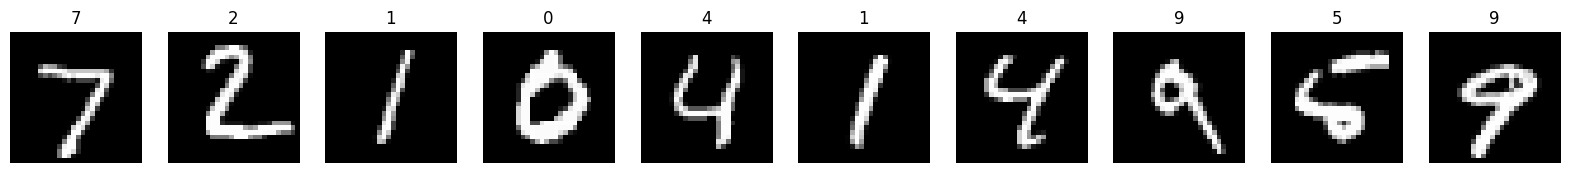

In [ ]:
import matplotlib.pyplot as plt

num_imgs_to_visualize = 10

figure = plt.figure(figsize=(20, 20))

for i in range(num_imgs_to_visualize):
    # here we indexing the Dataset-object "as is" and gettig a tuple (img, label)
    img, label = test_data[i]

    figure.add_subplot(1, num_imgs_to_visualize, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis("off")
plt.show()

Чтобы дальнейший код воспроизводился, зафиксируем случайные состояния.

In [ ]:
import torch
import numpy as np
import random


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)


set_random_seed(42)

### Подготовка данных для обучения с помощью DataLoader

`Dataset` возвращает по одной паре "объект — метка" за раз. При обучении моделей мы обычно хотим получать обекты в виде мини-батчей, перемешивая данные на каждой эпохе для уменьшения переобучения.

`DataLoader` — это объект, который позволяет нам получать такие мини-батчи. При инициализации он принимает в себя объект `Dataset`, а также параметры `batch_size` (размер мини-батча) и `shuffle` (перемешивать ли данные в батчах каждую эпоху).

Другие параметры, а также значения по умолчанию можно посмотреть в документации PyTorch для класса `DataLoader` [🛠️[doc]](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=False)

Так как мы имели два объекта класса `Dataset`: `train_data` и `test_data`, то мы создаем также и два независимых `DataLoader`-а. Один из них позволит нам получать батчи из обучающей выборки, а другой — из тестовой.

Обратите внимание на параметр `shuffle`! По умолчанию он имеет значение `False`. **Для обучения нейронной сети критически важно, чтобы во время обучения батчи обучающих данных перемешивались**. Именно таким образом мы вносим **стохастичность** в процесс градиентного спуска. Поэтому для `DataLoader`-a, который будет выдавать батчи для обучения, необходимо использовать `shuffle=True`.

В противоположность этому — `DataLoader` для тестовых данных. Тестовые данные служат для оценки качества работы модели, на них не происходит обучение и градиентный спуск. Поэтому установка здесь `shuffle=True` не имеет большого смысла.

#### Итерирование по `DataLoader`

Мы загрузили набор данных в `DataLoader` и теперь можем проходиться по нему по мере необходимости. Каждая итерация в коде ниже будет возвращать мини-батч в виде кортежа тензоров `(samples, labels)`, содержащих `batch_size=8` объектов и меток соответственно.
Так как мы установили для `train_dataloader` параметр `shuffle=True`, когда мы пройдемся по всем батчам, данные перемешаются.

Images batch shape: torch.Size([8, 1, 28, 28]) : [batch_size, num_channels, H, W]
Labels batch shape: torch.Size([8])

The first sample in the batch:


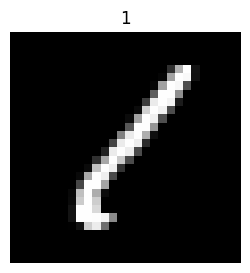

In [ ]:
# get one next batch
imgs, labels = next(iter(train_dataloader))

print(f"Images batch shape: {imgs.size()} : [batch_size, num_channels, H, W]")
print(f"Labels batch shape: {labels.size()}")

print("\nThe first sample in the batch:")
img = imgs[0].squeeze()
label = labels[0].item()

plt.figure(figsize=(3, 3))
plt.imshow(img, cmap="gray")
plt.title(label)
plt.axis("off")
plt.show()

#### Взвешенное формирование батчей для работы с дисбалансом

Еще одним атрибутом `DataLoader` является `sampler` [🛠️[doc]](https://pytorch.org/docs/stable/data.html#torch.utils.data.Sampler) — он отвечает за то, как объекты набираются в батчи. **По умолчанию** все объекты могут попадать в батчи **равновероятно**.

При работе с несбалансированными классами можно формировать батчи так, чтобы в каждом батче примерно был баланс классов.

Это может улучшать сходимость даже в случае небольшого дисбаланса или его отсутствия, т. к. мы будем избегать шаги обучения нейросети, в которых она просто не увидела какого-то класса в силу случайных причин.


<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L05/out/batch_balancing.png">

При таком подходе требуется, чтобы объекты попадали в батчи **не равновероятно, а с определенными весами**. В PyTorch эту функциональность можно получить, используя класс `WeightedRandomSampler` [🛠️[doc]](https://pytorch.org/docs/stable/data.html#torch.utils.data.WeightedRandomSampler). Для его инициализации требуется рассчитать вес каждого класса.

Сумма весов не обязана быть равна единице, важно только соотношение между весами. Часто соотношение весов делают обратно пропорциональным количеству объектов в классах.



```
_, classes_counts = torch.unique(y, return_counts=True)  # y — tensor of labels in train set
weights_for_classes = classes_counts.max() / classes_counts
```

В конструктор `WeightedRandomSampler` требуется подать два аргумента:

- список весов для **каждого** элемента в датасете;
- количество элементов (можно использовать не весь датасет).

Затем созданный `sampler` передается в конструктор `DataLoader`.

```
from torch.utils.data import WeightedRandomSampler

weight_for_every_sample = []  # Every sample must have a weight
for label in y:
    weight_for_every_sample.append(weights_for_classes[label].item())

sampler = WeightedRandomSampler(torch.tensor(weight_for_every_sample), len(dataset))
dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)
```

Когда у `DataLoader` указывается `sampler`, последний принимает на себя функцию перемешивания, поэтому параметр `shuffle` **должен** быть не указан.

Также отметим, что подобную процедуру взвешенного формирования батчей следует производить только с обучающими данными, но не с валидационными и тестовыми. Мы хотим, чтобы модель при обучении поровну видела объекты всех классов, но оценивать качество нужно на данных с реальным распределением.

Стоит отметить, что нужно быть осторожным со взвешиванием объектов в батчах и **контролировать состав батчей**. Дело в том, что при существенном дисбалансе веса при объектах минорного класса могут оказываться на несколько порядков больше, чем при объектах мажорного класса. Данные веса преобразуются в вероятности для сэмплирования, и может случиться так, что вероятности при объектах мажорного класса станут численно неотличимы от нуля. Тем самым можно получить обратный эффект: батчи будут состоять исключительно из объектов минорного класса. В таком случае нужно намеренно ограничивать веса.

## Трансформации (Transforms)

Данные не всегда поступают в том формате, который требуется для работы моделей машинного обучения. Для того, чтобы производить некоторые преобразования с данными, чтобы они становились пригодны для обучения, в PyTorch реализован механизм трансформаций (transforms).

Все наборы данных в Torchvision имеют два параметра: `transform` — для применения трансформаций к входным данным, и `target_transform` — соответственно для преобразования меток.
Эти параметры принимают в себя вызываемые (callable) объекты, содержащие логику преобразований. Модуль `torchvision.transforms` [🛠️[doc]](https://pytorch.org/vision/stable/transforms.html) предоставляет ряд часто используемых трансформаций "из коробки".

Важно понимать, что трансформации, указанные в `transform` и `target_transform`, **применяются к данным налету**, то есть в момент обращения к этим данным через `Dataset` или `DataLoader`.

### ToTensor

Изображения в MNIST (и в большинстве других встроенных датасетов) изначально хранятся в формате PIL Image (Python Image Library), а метки представлены как целые числа. Если с метками, представленными таким образом, ничего делать не нужно, то входные данные для обучения необходимо перевести в тензоры. Чтобы произвести эту трансформацию, выше при загрузке данных MNIST мы использовали `torchvision.transforms.ToTensor` [🛠️[doc]](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor).

`ToTensor` преобразует PIL Image или NumPy `ndarray` в `FloatTensor` **и масштабирует значения интенсивности пикселей к диапазону $[0., 1.]$**.

### Normalize

Предположим, что помимо перевода данных в подходящий формат мы бы хотели произвести какие-то преобразования с самими величинами. Скажем, произвести нормализацию: вычесть математическое ожидание и разделить на стандартное отклонение по выборке. Для проведения такой операции в `torchvision.transforms` предусмотрена трансформация `Normalize` [🛠️[doc]](https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html).

Два обязательных параметра в этой трансформации — это `mean` и `std`:
* `mean` — последовательность математических ожиданий по каждому каналу выборки изображений,
* `std` — последовательность стандартных отклонений по каждому каналу выборки изображений.

`Normalize` не применяется к PIL Image, поэтому ее необходимо применять после `ToTensor`.

Давайте вычислим среднее и стандартное отклонение для обучающей выборки MNIST. Для этого обратимся к `train_data.data`:

In [ ]:
import torch

print("train_data.data:")
print("Type: ", type(train_data.data))
print("Size: ", train_data.data.size())
print("Dtype:", train_data.data.dtype)
print("Max:  ", torch.max(train_data.data).item())
print("Min:  ", torch.min(train_data.data).item())

train_data.data:
Type:  <class 'torch.Tensor'>
Size:  torch.Size([60000, 28, 28])
Dtype: torch.uint8
Max:   255
Min:   0


`train_data.data` — тензор целых чисел (`uint8`) c минимальным значением $0$ и максимальным значением $255$. Функции `torch.mean()` и `torch.std()` выдадут ошибку, если передать им тензор целых чисел. Поэтому изменим тип на вещественный, применив метод `.double()`.

In [ ]:
mean = torch.mean(train_data.data.double()).item()
std = torch.std(train_data.data.double()).item()
print(f"mean = {mean:.2f}, std = {std:.2f}")

mean = 33.32, std = 78.57


Вспомним, что `Normalize` должна применяться после `ToTensor`, которая масштабирует величины в диапазон $[0., 1.]$. Значит, матожидание и стандартное отклонение мы также должны разделить на максимальное значение до масштабирования — на $255$.

In [ ]:
mean /= 255
std /= 255
print(f"Scaled mean = {mean:.2f}, std = {std:.2f}")

Scaled mean = 0.13, std = 0.31


### Compose

Мы вычислили среднее и стандартное отклонение по обучающей выборке MNIST для применения транcформации `Normalize`. Но мы также помним, что она должна применяться только после `ToTensor`. Как же объединить несколько трансформаций в одну, чтобы они применились последовательно?

Для этого предусмотрен класс `torchvision.transforms.Compose` [🛠️[doc]](https://pytorch.org/vision/main/generated/torchvision.transforms.Compose.html). Его единственный параметр — список принимаемых трансформаций. `Compose` — это контейнер для трансформаций, помещаясь в который они будут применяться одна за одной. В общем случае их может быть сколько угодно. Давайте напишем трансформацию, которая примет в себя две: `ToTensor` и `Normalize`.

In [ ]:
from torchvision import transforms

transform_with_normalize = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(mean, std)]
)

print(transform_with_normalize)

Compose(
    ToTensor()
    Normalize(mean=0.1306604762738429, std=0.30810780717887876)
)


Остается только подменить у обучающего и тестового датасетов ту трансформацию, которую мы указали при загрузке данных, на нашу новую — с нормализацией. Для этого посмотрим на атрибут `.transform` и изменим его.

In [ ]:
print("Old train transform:", train_data.transform)
print("Old test transform:", test_data.transform)

train_data.transform = transform_with_normalize
test_data.transform = transform_with_normalize

print("\nNew train transform:", train_data.transform)
print("New test transform:", test_data.transform)

Old train transform: ToTensor()
Old test transform: ToTensor()

New train transform: Compose(
    ToTensor()
    Normalize(mean=0.1306604762738429, std=0.30810780717887876)
)
New test transform: Compose(
    ToTensor()
    Normalize(mean=0.1306604762738429, std=0.30810780717887876)
)


Следует еще раз заметить, что при нормализации мы **вычисляем** оценки математического ожидания и стандартного отклонения `mean` и `std` **на обучающих данных**, а **применяем** вычисленные оценки **и на обучающих, и на тестовых данных**.

Теперь при обращении к данным через `DataLoader` будет происходить следующее:

1. Объект `DataLoader` обращается к объекту `Dataset` за данными, чтобы сформировать батч.
2. `Dataset` считывает данные, которые хранятся на диске, в формате PIL Image, применяет к ним трансформации, указанные в его атрибуте `.transform` (в данном случае это последовательность `ToTensor` и `Normalize`) и возвращает `DataLoader`-у преобразованные данные.
3. `DataLoader` формирует из полученных данных батч и возвращает его.

Обратите внимание, что на диске по-прежнему лежат просто изображения в своем специальном формате, и их довольно много. Но при этом в каждый момент времени мы не храним на диске все изображения как тензоры в сыром виде или в нормализованном. Нужные операции применяются к данным налету, только когда они нужны — при формировании батчей.

## Создание нейронной сети

Нейронные сети состоят из слоев, которые производят преобразования над данными. В PyTorch принято называть слои ***модулями*** (modules), и далее мы тоже будем использовать это название.

Пространство имен `torch.nn` [🛠️[doc]](https://pytorch.org/docs/stable/nn.html) предоставляет "строительные блоки", которые нужны для создания своей собственной нейронной сети. Каждый *модуль* в PyTorch является дочерним классом от `nn.Module` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Таким образом, нейронная сеть сама по себе будет являться *модулем*, состоящим из других *модулей* (слоев). Такая вложенная структура позволяет легко создавать сложные архитектуры и управлять ими.

Ниже мы рассмотрим пример создания нейронной сети для классификации изображений из набора данных MNIST.

### Выбор устройства (device) для обучения

Мы бы хотели иметь возможность обучать модель на аппаратном ускорителе, таком как GPU, если он доступен. Проверим, доступен ли нам ускоритель `torch.cuda` [🛠️[doc]](https://pytorch.org/docs/stable/notes/cuda.html), иначе продолжим вычисления на CPU.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


### Описание класса модели

Мы определяем нейронную сеть, наследуясь от класса `nn.Module`, и инициализируем ее слои в методе `__init__`. Каждый класс-наследник `nn.Module` производит операции над входными данными в методе `forward`.

Напишем собственную нейронную сеть как класс `NeuralNetwork`. Ниже подробно рассмотрим все составляющие ее части.

In [ ]:
from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 100),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

Создадим экземпляр класса `NeuralNetwork`, переместим его на `device` с помощью метода `to` и выведем информацию о структуре модели:

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=100, bias=True)
  )
)


Чтобы использовать модель, мы передаем ей входные данные. Это приводит в действие метод `forward`, а также определенные фоновые операции. Не следует вызывать `model.forward` напрямую!

Вызов модели с входными данными возвращает тензор с двумя размерностями: нулевая размерность `dim=0` соответствует  количеству переданных примеров, а первая `dim=1` — десяти выходным "сырым" предсказаниям (логитам) для каждого класса.

Мы можем получить предсказание модели в виде вероятностей, пропустив логиты через экземпляр модуля `nn.Softmax`, вызвав его вычисление вдоль первой размерности `dim=1`.

In [ ]:
# random input of 3 images
sample_batch = torch.rand(
    3, 28, 28, device=device
)  # [batch_size, num_channels, H, W]

# model output
logits = model(sample_batch)

# predicted probabilities
pred_probab = nn.Softmax(dim=1)(logits)

# predicted classes
y_pred = pred_probab.argmax(dim=1)

print(f"Input size:       {sample_batch.size()} : [batch_size, num_channels, H, W]")
print(f"Output size:      {logits.size()}        : [batch_size, num_classes]")
print(
    f"Predicted class:  {y_pred}          : [class for sample 1, class for sample 2, class for sample 3]"
)

Input size:       torch.Size([3, 28, 28]) : [batch_size, num_channels, H, W]
Output size:      torch.Size([3, 100])        : [batch_size, num_classes]
Predicted class:  tensor([66, 29, 29])          : [class for sample 1, class for sample 2, class for sample 3]


### Слои модели

Давайте заглянем "под капот" нашей модели `NeuralNetwork`. Для иллюстрации возьмем мини-батч из трех одноканальных изображений $28×28$ и посмотрим, что с ним происходит, когда мы пропускаем его через сеть.

In [ ]:
sample_batch = torch.rand(3, 28, 28)
print(f"Input size: {sample_batch.size()}")

Input size: torch.Size([3, 28, 28])


#### Слой `nn.Flatten`

Мы используем слой `nn.Flatten` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) для преобразования каждого изображения $1×28×28$ пикселей в непрерывный массив из $784$ значений (размер батча (на позиции `dim=0`) сохраняется).

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(sample_batch)
print(f"Size after Flatten: {flat_image.size()}")

Size after Flatten: torch.Size([3, 784])


#### Слой `nn.Linear`

Линейный слой `nn.Linear` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) — это модуль, который производит линейное преобразование входных данных с помощью хранящихся в нем весов и смещений.

Обязательными параметрами при объявлении этого слоя являются `in_features` — количество входных признаков, и `out_features` — количество выходных признаков.

Фактически, этот модуль добавляет в модель один полносвязный слой нейронов *без активаций*. Слой состоит из `out_features` нейронов, каждый из которых имеет `in_features` входов.

В примере ниже мы объявляем слой из $512$ нейронов, каждый из которых получает "вытянутое" изображение из $784$ пикселей.

In [ ]:
layer1 = nn.Linear(in_features=784, out_features=512)
hidden1 = layer1(flat_image)
print(f"Size after Linear:  {hidden1.size()}")

Size after Linear:  torch.Size([3, 512])


Линейный слой, в отличие от слоя `nn.Flatten`, имеет обучаемые параметры — веса и смещения. Они хранятся как объекты специального класса `torch.nn.parameter.Parameter` и содержат в себе тензоры собственно с величинами параметров. Получить доступ к ним можно, обратившись к атрибутам слоя `.weight` и `.bias` соответственно.

In [ ]:
print(f"Size of linear layer weights: {layer1.weight.size()}")
print(f"Type of linear layer weights: {type(layer1.weight)}")

print(f"\nSize of linear layer biases: {layer1.bias.size()}")
print(f"Type of linear layer biases: {type(layer1.bias)}")

Size of linear layer weights: torch.Size([512, 784])
Type of linear layer weights: <class 'torch.nn.parameter.Parameter'>

Size of linear layer biases: torch.Size([512])
Type of linear layer biases: <class 'torch.nn.parameter.Parameter'>


#### Слой `nn.ReLU`

Нелинейные активации — это то, что позволяет модели учить сложные взаимосвязи между входом и выходом. Они применяются после линейных преобразований чтобы ввести *нелинейность*, помогая нейронным сетям изучать самые разные закономерности.

В данной модели мы используем `nn.Relu` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) между линейными слоями, но существуют и реализации [других функций активации 🛠️[doc]](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity).

In [ ]:
activations1 = nn.ReLU()(hidden1)

print(f"Before ReLU:  {hidden1}")
print(f"After ReLU:  {activations1}")
print(f"\n Size after ReLU:  {activations1.size()}")

Before ReLU:  tensor([[-0.4597,  0.1356,  0.3653,  ..., -0.0648,  0.0244, -0.5262],
        [-0.3560,  0.2304,  0.1946,  ...,  0.2992, -0.1675, -0.4588],
        [-0.2568,  0.0888, -0.0277,  ...,  0.3266, -0.3138, -0.4989]],
       grad_fn=<AddmmBackward0>)
After ReLU:  tensor([[0.0000, 0.1356, 0.3653,  ..., 0.0000, 0.0244, 0.0000],
        [0.0000, 0.2304, 0.1946,  ..., 0.2992, 0.0000, 0.0000],
        [0.0000, 0.0888, 0.0000,  ..., 0.3266, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)

 Size after ReLU:  torch.Size([3, 512])


#### Объединение модулей в `nn.Sequential`

`nn.Sequential` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) — это упорядоченный контейнер для модулей. Данные проходят через все модули в том же порядке, в котором они определены в `nn.Sequential`. Можно использовать такой контейнер для того, чтобы быстро собрать простую нейронную сеть, как `seq_modules` в примере ниже.

In [ ]:
seq_modules = nn.Sequential(flatten, layer1, nn.ReLU(), nn.Linear(512, 10))

sample_batch = torch.rand(3, 1, 28, 28)
logits = seq_modules(sample_batch)

print(f"Output size: {logits.size()}")

Output size: torch.Size([3, 10])


#### Слой `nn.Softmax`

Последний линейный слой нейронной сети возвращает *логиты* — "сырые" значения из диапазона $[-∞; +∞]$, которые могут быть пропущены через модуль `nn.Softmax` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html). Пропущенные через $\text{Softmax}$ величины могут восприниматься как вероятности, с которыми модель относит данный объект к тому или иному классу. Параметр `dim` определяет размерность, вдоль которой величины должны суммироваться к $1$.

In [ ]:
softmax = nn.Softmax(dim=1)

pred_probab = softmax(logits)

print(f"Size after Softmax: {pred_probab.size()}")

Size after Softmax: torch.Size([3, 10])


### Параметры модели

Множество слоев в нейронных сетях имеют *обучаемые параметры*, т. е. имеют ассоциированные с ними веса и смещения, которые оптимизируются во время обучения.

Наследование от `nn.Module` автоматически отслеживает все слои, определенные внутри вашего класса модели, и делает все их параметры доступными с помощью методов `model.parameters()` или `model.named_parameters()`.

В примере ниже мы проходимся по всем параметрам модели, и для каждого тензора параметров выводим его размер.

In [ ]:
print(f"Model structure: {model}\n")

for name, param in model.named_parameters():
    print(f"Layer: {name:25}  Size: {param.size()}")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

Layer: layers_stack.0.weight      Size: torch.Size([512, 784])
Layer: layers_stack.0.bias        Size: torch.Size([512])
Layer: layers_stack.2.weight      Size: torch.Size([128, 512])
Layer: layers_stack.2.bias        Size: torch.Size([128])
Layer: layers_stack.4.weight      Size: torch.Size([10, 128])
Layer: layers_stack.4.bias        Size: torch.Size([10])


## Обучение нейронной сети

Теперь, когда у нас есть данные и модель, настало время ее обучить, то есть оптимизировать ее параметры на обучающих данных.

Обучение модели — итеративный процесс. На каждой итерции модель получает входные данные, дает предсказание на выходе, вычисляет значение функции потерь (loss), вычисляет производные функции потерь по параметрам и подстраивает параметры, используя градиентный спуск.

### Гиперпараметры

Гиперпараметры — это задаваемые разработчиком параметры, которые позволяют управлять процессом обучения. Различные значения гиперпараметров могут влиять на обучение модели и скорость сходимости ([подробнее про подбор гиперпараметров 🛠️[doc]](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)).

Мы определим следующие гиперпараметры процедуры обучения:
* **количество эпох** (`num_epochs`) — количество итераций обучения по всему набору данных;
* **размер батча** (`batch_size`) — количество образцов, передаваемых в сеть для обновления параметров;
* **скорость обучения** (`learning_rate`) — коэффициент, определяющий, насколько сильно нужно обновлять параметры модели на каждом батче. Малые значения приводят к долгому обучению, в то время как большие значения могут приводить к непредсказуемому поведению во время обучения.


In [ ]:
num_epochs = 10
batch_size = 64
learning_rate = 1e-3

Выше для демонстрации мы указывали размер батча в `DataLoader`-ах равным восьми. Для установки нового значения придется переопределить `DataLoader`-ы.

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

### Оптимизация параметров (обучение сети)

Задав гиперпараметры, мы можем приступить к обучению модели. Каждая итерация цикла оптимизации называется **эпохой**.

Каждая эпоха состоит из двух частей:
* **цикл обучения (Train Loop)** — проход по обучающему набору данных и оптимизация параметров;
* **цикл валидации (Validation Loop)** — проход по валидационному/тестовому набору данных и контроль того, что качество работы сети улучшается.

Кратко ознакомимся с некоторыми понятиями, используемыми в цикле оптимизации.

#### Функция потерь (Loss function)

Так как мы решаем задачу классификации со сбалансированным датасетом, выберем `nn.CrossEntropyLoss` [🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) в качестве функции потерь.



In [ ]:
# Initialize the loss function
criterion = nn.CrossEntropyLoss()

#### Оптимизатор (Optimizer)

Оптимизация — это процесс подстройки параметров модели для уменьшения ошибки на каждом шаге обучения. От **алгоритма оптимизации** зависит то, как этот процесс будет выполняться. Здесь мы будем использовать стохастический градиентный спуск (Stochastic Gradient Descent, SGD). Однако в PyTorch реализовано еще [множество других алгоритмов оптимизации 🛠️[doc]](https://pytorch.org/docs/stable/optim.html#algorithms), таких как Adam и RMSProp, и они могут работать лучше или хуже для разных видов моделей и данных.

Вся логика оптимизации заключена в объекте `optimizer`. Мы инициализируем оптимизатор, передавая ему параметры модели, которые требуется обучать (`model.parameters()`), а также гиперпараметр скорости обучения (`learning_rate`).

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Внутри цикла обучения оптимизация производится за три шага:
1. Вызов `optimizer.zero_grad()`, чтобы сбросить градиенты параметров модели. По умолчанию градиенты суммируются, и во избежание повторного вычисления их необходимо явно обнулять на каждой итерации;
2. Обратное распространение ошибки предсказания с помощью вызова `loss.backward()`. PyTorch вычислит градиенты функции потерь относительно каждого обучаемого параметра;
3. Когда у нас есть градиенты, мы вызываем `optimizer.step()`, чтобы подстроить обучаемые параметры с учетом градиентов, посчитанных при обратном распространении, согласно алгоритму оптимизации.


### Реализация обучения

Мы определим две функции:
* `train_loop`, которая производит цикл обучения,
* `test_loop`, которая оценивает качество модели на тестовых данных.

In [ ]:
def train_loop(dataloader, model, criterion, optimizer):
    num_batches = len(dataloader)

    train_loss = 0

    for imgs, labels in dataloader:
        # Compute prediction and loss
        pred = model(imgs.to(device))
        loss = criterion(pred, labels.to(device))
        print(pred.size())
        print(pred.argmax(1))
        # Optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= num_batches
    print(f"Train loss: {train_loss:>8f}")

    return train_loss


def test_loop(dataloader, model, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0

    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device))

            loss = criterion(pred, labels.to(device))

            test_loss += loss.item()
            correct += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )

    test_loss /= num_batches
    correct /= size
    print(f"Test loss: {test_loss:>8f}, test accuracy: {(100*correct):>0.1f}% \n")

    return test_loss

Выше мы объявили гиперпараметры и инициализировали функцию потерь `criterion` и оптимизатор `optimizer`. Теперь мы запускаем цикл оптимизации на $10$ эпох, и в каждой итерации мы вызываем функцию для выполнения цикла обучения `train_loop`, а затем функцию для промежуточной оценки качества `test_loop`. Также на каждой эпохе будем сохранять текущее значение функции потерь на обучающих и тестовых данных для построения графика обучения.

In [ ]:
# for plotting
loss_history = {"train": [], "test": []}

for i in range(2):
    print(f"Epoch {i+1}")
    train_loss = train_loop(train_dataloader, model, criterion, optimizer)
    test_loss = test_loop(test_dataloader, model, criterion)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print("Done!")

Выходные данные были обрезаны до нескольких последних строк (5000).
        8, 7, 0, 6, 1, 9, 5, 6, 1, 1, 0, 8, 9, 8, 0, 9, 7, 3, 2, 6, 9, 1, 4, 1,
        3, 9, 8, 7, 3, 0, 5, 6, 3, 2, 1, 6, 8, 8, 3, 7])
torch.Size([64, 100])
tensor([2, 1, 9, 4, 1, 0, 3, 0, 9, 1, 0, 0, 2, 3, 7, 8, 4, 8, 0, 2, 4, 2, 8, 1,
        0, 0, 7, 3, 2, 4, 3, 4, 2, 5, 5, 4, 4, 8, 0, 1, 3, 2, 0, 4, 8, 6, 6, 8,
        0, 2, 2, 7, 1, 7, 3, 5, 5, 0, 1, 1, 6, 9, 5, 2])
torch.Size([64, 100])
tensor([7, 8, 1, 8, 4, 6, 0, 4, 1, 2, 9, 2, 8, 0, 0, 3, 0, 2, 9, 8, 3, 2, 1, 8,
        7, 6, 7, 3, 4, 8, 8, 3, 0, 0, 4, 2, 2, 4, 0, 9, 1, 8, 9, 5, 4, 1, 8, 6,
        2, 7, 8, 4, 1, 3, 0, 7, 0, 0, 7, 1, 2, 7, 3, 6])
torch.Size([64, 100])
tensor([5, 6, 8, 5, 9, 1, 1, 6, 8, 1, 3, 2, 8, 9, 3, 3, 6, 1, 8, 8, 7, 0, 8, 7,
        3, 7, 5, 8, 1, 7, 3, 1, 3, 6, 4, 1, 6, 3, 2, 0, 3, 8, 2, 6, 1, 4, 7, 9,
        2, 2, 6, 8, 1, 1, 6, 4, 7, 8, 6, 9, 1, 2, 9, 2])
torch.Size([64, 100])
tensor([7, 5, 1, 3, 2, 2, 6, 7, 0, 3, 8, 3, 4, 1, 7, 5, 

Построим график функции потерь на обучающих и на тестовых данных по эпохам:

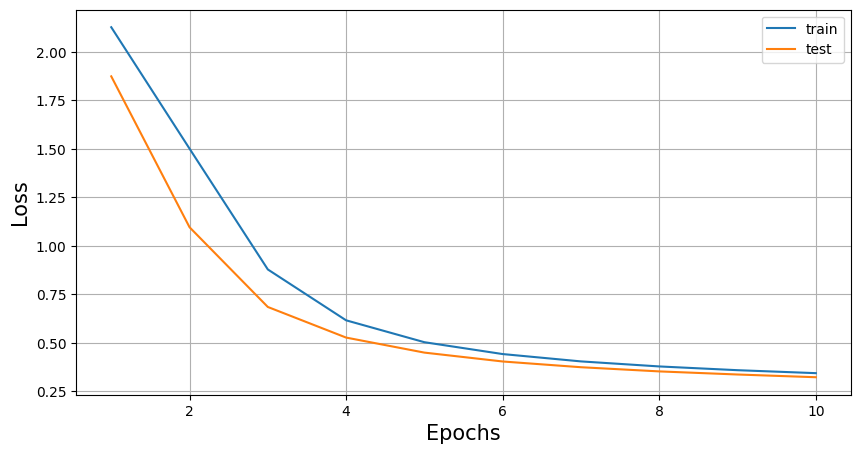

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.show()

###  Предсказания обученной модели

Поэтапно пропустим тестовые изображения через модель и визуализируем результат:

In [ ]:
# get batch
imgs, labels = next(iter(test_dataloader))
print("imgs shape: ", imgs.shape)

imgs shape:  torch.Size([8, 1, 28, 28])


In [ ]:
# get output
pred = model(imgs.to(device))
print("pred shape: ", pred.shape)

pred shape:  torch.Size([64, 10])


In [ ]:
# remove axis
imgs = torch.reshape(imgs, (64, 28, 28))
print("imgs shape(after reshape): ", imgs.shape)

imgs shape(after reshape):  torch.Size([64, 28, 28])


In [ ]:
# take 10 first images
imgs = imgs[:10]
print("imgs shape: ", imgs.shape)

imgs shape:  torch.Size([10, 28, 28])


In [ ]:
import numpy as np

pred = pred[:10].detach()
print("Prediction(1 sample):\n", pred[0])

digits = np.argmax(pred.cpu().numpy(), axis=1)
print("Predicted class: ", digits[0])

Prediction(1 sample):
 tensor([-1.0312, -2.5485, -0.5943,  1.7145, -1.2687, -1.0487, -7.1368,  8.7403,
        -1.2757,  2.7136])
Predicted class:  7


Визуализируем изображения, подпишем предсказанное и истинное значение:

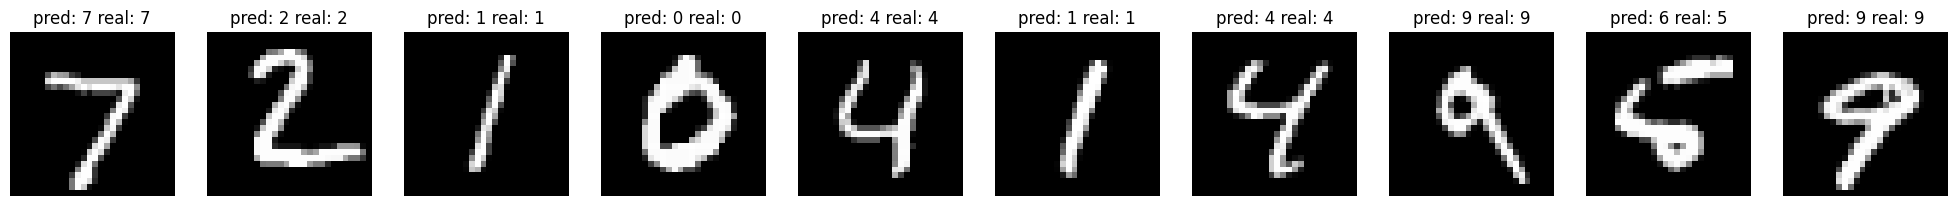

In [ ]:
plt.figure(figsize=(25.0, 25.0))
for i in range(10):
    img = imgs[i]

    plt.subplot(1, 10, i + 1)
    plt.title(
        f"pred: {digits[i]} real: {labels[i].numpy()}"
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

## Сохранение и загрузка весов модели

Обычно обучение модели является достаточно затратным процессом с точки зрения вычислительных ресурсов. Поэтому, однажды обучив сеть, разумно будет сохранить ее для последующего использования. Рассмотрим варианты, как это можно сделать в PyTorch.

Модели PyTorch хранят обучаемые параметры во внутреннем словаре состояния, который называется `state_dict`. Их можно сохранить с помощью метода `torch.save`.


In [ ]:
torch.save(model.state_dict(), "model_weights.pth")

Для того, чтобы загрузить веса модели, сперва необходимо создать экземпляр такой модели, а затем загрузить параметры с помощью метода `load_state_dict()`.

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model_weights.pth"))
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


Данный способ сохранения модели подходит только для случая, когда в дальнейшем не предполагается продолжать обучать модель. Для продолжения обучения также необходимо как минимум сохранять состояние оптимизатора.

[[doc] 🛠️ О более общем сохранении состояний модели, оптимизатора и других объектов](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-a-general-checkpoint-for-inference-and-or-resuming-training)

Сохранение в общем случае может выглядеть так:

```
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss_history': loss_history,
            ...
            }, PATH)
```



<font size=6>Литература</font>

<font size=5>Многослойные нейронные сети:</font>

* [[demo] 🎮 Интерактивный тренажер от TensorFlow ](http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=&seed=0.62952&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
* [[wiki] 📚 Теорема Цыбенко](https://ru.wikipedia.org/wiki/Теорема_Цыбенко)
* [[book] 📚 Neural Networks and Deep Learning: визуальное доказательство теоремы об универсальной аппроксимации](http://neuralnetworksanddeeplearning.com/chap4.html)

<font size=5>Обучение нейронной сети:</font>

* [[blog] ✏️ ML: Вычислительный граф](https://qudata.com/ml/ru/ML_Comp_Graph.html)
* [[blog] ✏️ Обзор функций потерь в PyTorch с примером написания своей собственной функции (custom loss function)](https://neptune.ai/blog/pytorch-loss-functions)
* [[colab] 🥨 Подробное рассмотрение Focal Loss с примерами](https://colab.research.google.com/drive/1rM7zRySu8WulXbFiXzxBGVzILxvQ6K4A)
* [[arxiv] 🎓 Focal Loss for Dense Object Detection (Lin et al., 2017)](https://arxiv.org/abs/1708.02002)
* [[blog] ✏️ Объяснение Negative Log Likelihood Loss](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)
* [[blog] ✏️ О соотношении Cross-Entropy Loss и Negative Log Likelihood Loss](https://jamesmccaffrey.wordpress.com/2020/06/11/pytorch-crossentropyloss-vs-nllloss-cross-entropy-loss-vs-negative-log-likelihood-loss/)
* [[blog] ✏️ How Activation Functions Work in Deep Learning](https://www.kdnuggets.com/2022/06/activation-functions-work-deep-learning.html)

<font size=5>Углубление в PyTorch. Пример нейронной сети на MNIST:</font>
* [[doc] 🛠️ PyTorch: Learn the basics tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html)
* [[video] 📺 Плей-лист с объяснением базовых принципов нейронных сетей от 3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=O3gq6RoIxoNS6iJf) [[озвучка на русском](https://youtube.com/playlist?list=PLZjXXN70PH5itkSPe6LTS-yPyl5soOovc&si=ElKVi98Ui4m2nJKq)]
* [[doc] 🛠️ PyTorch: Сохранение состояний модели, оптимизатора и других объектов](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-a-general-checkpoint-for-inference-and-or-resuming-training)

<font size=5>Дополнительно:</font>
* [[wiki] 📚 Теорема об универсальной аппроксимации](https://en.wikipedia.org/wiki/Universal_approximation_theorem)
* [[book] 📚 Deep Learning](https://www.deeplearningbook.org/)
 * [[book] 📚 Part 2, Chapter 6: Deep Feedforward Networks](https://www.deeplearningbook.org/contents/mlp.html)
* [[demo] 🎮 Интерактивное и визуальное объяснение работы многослойных нейронных сетей](https://mlu-explain.github.io/neural-networks/)
* [[demo] 🎮 Интерактивная визуализация ландшафтов функций потерь в нейронных сетях](https://losslandscape.com/explorer)
* [[blog] ✏️ Understanding Loss Functions in Machine Learning](https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/)
* [[blog] ✏️ Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names](https://gombru.github.io/2018/05/23/cross_entropy_loss/)
* Курс А. Г. Дьяконова "Глубокое обучение". Лекции по PyTorch:
 * [[video] 📺 часть 1](https://www.youtube.com/watch?v=tDJnwc8Hioc)
 * [[video] 📺 часть 2](https://www.youtube.com/watch?v=c3y--ydWku0)